# EDA - dataset CIC-IDS2017

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load the dataset

In [2]:
train_df = pd.read_parquet("../datasets/CIC-IDS2017/train_set.parquet")

# Creation of a bool column Attack (this will be done in the pipeline, as well as data cleaning and preprocessing)
train_df.rename(columns={'label': 'attack_type'}, inplace=True)
train_df['attack'] = train_df['attack_type'].apply(lambda x: False if x == 'benign' else True)

# Drop constant columns (also this will be done in the pipeline)
train_df.drop(columns=[col for col in train_df.columns if train_df[col].nunique() == 1], inplace=True)

# Drop useless columns (also this will be done in the pipeline)
train_df.drop(columns=['flow_id', 'src_addr', 'src_port', 'dst_addr', 'dst_port', 'timestamp'], inplace=True)

# Fix negative and infinite values (also this will be done in the pipeline)
train_df = train_df.replace([np.inf, -np.inf], np.nan)  # Replace inf/-inf with NaN temporarily
for col in train_df.columns:
    if train_df[col].dtype not in ['object', 'category', 'bool']:  # Ensure numeric columns
        max_val = train_df[train_df[col] > 0][col].max()
        train_df[col] = train_df[col].fillna(max_val)  # Replace inf and NaN caused by inf
        min_val = train_df[train_df[col] >= 0][col].min()
        train_df[col] = train_df[col].apply(lambda x: min_val if x < 0 else x)  # Replace negative values with the minimum

# Cast eligible float columns to int (also this will be done in the pipeline)
for col in train_df.select_dtypes(include=['float']).columns:
    # Check if all values in the column are integers
    if np.all(train_df[col] == train_df[col].astype(int)):
        train_df[col] = train_df[col].astype(int)

# Cast integer columns with min value 0 and max value 1 to bool (also this will be done in the pipeline)
columns_to_cast = [col for col in train_df.columns
                   if pd.api.types.is_integer_dtype(train_df[col]) and train_df[col].min() == 0 and train_df[col].max() == 1]
train_df[columns_to_cast] = train_df[columns_to_cast].astype(bool)

train_df.head()

prot  flow_duration  tot_fwd_pkt  tot_bwd_pkt  fwd_pkt_len_tot  \
9761      17          48427            4            2              280   
114795    17       86480606            2            2              100   
127927     6          47309            3            4              440   
157389     6       98688759            6            6              356   
114162     6             44            1            1                0   

        bwd_pkt_len_tot  fwd_pkt_len_max  fwd_pkt_len_min  fwd_pkt_len_mean  \
9761                296               70               70         70.000000   
114795              208               52               48         50.000000   
127927              859              440                0        146.666667   
157389            11595              356                0         59.333333   
114162                6                0                0          0.000000   

        fwd_pkt_len_std  bwd_pkt_len_max  bwd_pkt_len_min  bwd_pkt_len_mean  \
9761           0.000000              148              148            148.00   
114795         2.828427              112               96            104.00   
127927       254.034118              859                0            214.75   
157389       145.336391             5792                0           1932.50   
114162         0.000000                6                6              6.00   

        bwd_pkt_len_std  flow_byte_per_s  flow_pkt_per_s  flow_iat_mean  \
9761           0.000000     11894.191260      123.897826   9.685400e+03   
114795        11.313709         3.561492        0.046253   2.880000e+07   
127927       429.500000     27457.777590      147.963390   7.884833e+03   
157389      2181.008184       121.097885        0.121594   8.971705e+06   
114162         0.000000    136363.636400    45454.545450   4.400000e+01   

        flow_iat_std  flow_iat_max  flow_iat_min  fwd_iat_tot  fwd_iat_mean  \
9761    1.406531e+04         30853             3        30860  1.028667e+04   
114795  4.990000e+07      86400000           533     86400000  8.640000e+07   
127927  1.196964e+04         23526             3        23429  1.171450e+04   
157389  2.980000e+07      98700000             1     98700000  1.970000e+07   
114162  0.000000e+00            44            44            0  0.000000e+00   

         fwd_iat_std  fwd_iat_max  fwd_iat_min  bwd_iat_tot  bwd_iat_mean  \
9761    1.781097e+04        30853            3            4  4.000000e+00   
114795  0.000000e+00     86400000     86400000     86500000  8.650000e+07   
127927  1.625992e+04        23212          217        24163  8.054333e+03   
157389  4.410000e+07     98700000            1        11500  2.300000e+03   
114162  0.000000e+00            0            0            0  0.000000e+00   

         bwd_iat_std  bwd_iat_max  bwd_iat_min  fwd_psh_flag  fwd_urg_flag  \
9761        0.000000            4            4         False         False   
114795      0.000000     86500000     86500000         False         False   
127927  13645.051020        23809            3         False         False   
157389   4845.773829        10967           47         False         False   
114162      0.000000            0            0         False         False   

        fwd_head_len  bwd_head_len  fwd_pkt_per_s  bwd_pkt_per_s  pkt_len_min  \
9761              80            40      82.598550      41.299275           70   
114795            52            52       0.023127       0.023127           48   
127927           104           136      63.412881      84.550508            0   
157389           200           200       0.060797       0.060797            0   
114162            40            20   22727.272730   22727.272730            0   

        pkt_len_mean  pkt_len_std  pkt_len_max   pkt_len_var  fin_flag_cnt  \
9761             148    92.285714    38.060103  1.448571e+03         False   
114795           112    72.000000    29.799329  8.880000e+02         False   
127927           859   162.375000 

In [3]:
train_df.shape

(440632, 72)

In [4]:
train_df.describe().T

count          mean           std       min  \
prot                  440632.0  8.418365e+00  4.560053e+00  0.000000   
flow_duration         440632.0  1.867120e+07  3.667681e+07  0.000000   
tot_fwd_pkt           440632.0  8.523298e+00  7.943792e+02  1.000000   
tot_bwd_pkt           440632.0  9.211083e+00  1.040696e+03  0.000000   
fwd_pkt_len_tot       440632.0  3.981461e+02  5.656488e+03  0.000000   
bwd_pkt_len_tot       440632.0  1.560911e+04  2.365581e+06  0.000000   
fwd_pkt_len_max       440632.0  1.642985e+02  5.754016e+02  0.000000   
fwd_pkt_len_min       440632.0  1.262939e+01  5.653006e+01  0.000000   
fwd_pkt_len_mean      440632.0  4.418837e+01  1.519924e+02  0.000000   
fwd_pkt_len_std       440632.0  5.703116e+01  2.255542e+02  0.000000   
bwd_pkt_len_max       440632.0  1.459763e+03  2.686345e+03  0.000000   
bwd_pkt_len_min       440632.0  2.646782e+01  5.820568e+01  0.000000   
bwd_pkt_len_mean      440632.0  4.844064e+02  8.235775e+02  0.000000   
bwd_pkt_len_std       440632.0  6.028172e+02  1.183824e+03  0.000000   
flow_byte_per_s       440632.0  1.931024e+06  4.767092e+07  0.000000   
flow_pkt_per_s        440632.0  7.886520e+04  2.733986e+05  0.016727   
flow_iat_mean         440632.0  1.758577e+06  4.829169e+06  0.000000   
flow_iat_std          440632.0  4.547286e+06  9.879489e+06  0.000000   
flow_iat_max          440632.0  1.484837e+07  3.183866e+07  0.000000   
flow_iat_min          440632.0  1.652564e+05  3.082057e+06  0.000000   
fwd_iat_tot           440632.0  1.841205e+07  3.663997e+07  0.000000   
fwd_iat_mean          440632.0  3.443615e+06  9.728356e+06  0.000000   
fwd_iat_std           440632.0  5.715786e+06  1.301183e+07  0.000000   
fwd_iat_max           440632.0  1.473108e+07  3.189791e+07  0.000000   
fwd_iat_min           440632.0  8.560379e+05  8.057218e+06  0.000000   
bwd_iat_tot           440632.0  9.016655e+06  2.747083e+07  0.000000   
bwd_iat_mean          440632.0  1.808032e+06  8.548874e+06  0.000000   
bwd_iat_std           440632.0  2.051905e+06  8.139649e+06  0.000000   
bwd_iat_max           440632.0  5.688493e+06  2.043941e+07  0.000000   
bwd_iat_min           440632.0  7.768232e+05  7.507414e+06  0.000000   
fwd_head_len          440632.0  2.105030e+02  1.669394e+04  0.000000   
bwd_head_len          440632.0  2.166015e+02  2.081839e+04  0.000000   
fwd_pkt_per_s         440632.0  6.855165e+04  2.600068e+05  0.000000   
bwd_pkt_per_s         440632.0  9.088042e+03  4.046596e+04  0.000000   
pkt_len_min           440632.0  1.068293e+01  2.263484e+01  0.000000   
pkt_len_mean          440632.0  1.510930e+03  2.712413e+03  0.000000   
pkt_len_std           440632.0  2.473893e+02  3.982507e+02  0.000000   
pkt_len_max           440632.0  4.776657e+02  8.589868e+02  0.000000   
pkt_len_var           440632.0  9.659535e+05  2.346741e+06  0.000000   
down_up_ratio         440632.0  6.779217e-01  6.329342e-01  0.000000   
avg_pkt_size          440632.0  2.737326e+02  4.371673e+02  0.000000   
avg_fwd_segm_size     440632.0  4.418837e+01  1.519924e+02  0.000000   
avg_bwd_segm_size     440632.0  4.844064e+02  8.235775e+02  0.000000   
fwd_head_len_bis      440632.0  2.105030e+02  1.669394e+04  0.000000   
subflow_fwd_pkt       440632.0  8.523298e+00  7.943792e+02  1.000000   
subflow_fwd_byte      440632.0  3.981461e+02  5.656488e+03  0.000000   
subflow_bwd_pkt       440632.0  9.211083e+00  1.040696e+03  0.000000   
subflow_bwd_byte      440632.0  1.561100e+04  2.366076e+06  0.000000   
init_win_bytes_fwd    440632.0  7.569163e+03  1.360890e+04  0.000000   
init_win_bytes_bwd    440632.0  1.357328e+03  6.890049e+03  0.000000   
act_data_pkt_fwd      440632.0  5.583103e+00  7.538204e+02  0.000000   
min_seg_size_forward  440632.0  2.683370e+01  7.057742e+00  0.000000   
active_mean           440632.0  9.218460e+04  7.016794e+05  0.000000   
active_std            440632.0  3.447523e+04  3.695441e+05  0.000000   
active_max            440632.0  1.425726e+05  9.701917e+05  0.000

## Data Cleaning Checks

### Missing Values

In [5]:
train_df.isnull().sum()

prot                    0
flow_duration           0
tot_fwd_pkt             0
tot_bwd_pkt             0
fwd_pkt_len_tot         0
bwd_pkt_len_tot         0
fwd_pkt_len_max         0
fwd_pkt_len_min         0
fwd_pkt_len_mean        0
fwd_pkt_len_std         0
bwd_pkt_len_max         0
bwd_pkt_len_min         0
bwd_pkt_len_mean        0
bwd_pkt_len_std         0
flow_byte_per_s         0
flow_pkt_per_s          0
flow_iat_mean           0
flow_iat_std            0
flow_iat_max            0
flow_iat_min            0
fwd_iat_tot             0
fwd_iat_mean            0
fwd_iat_std             0
fwd_iat_max             0
fwd_iat_min             0
bwd_iat_tot             0
bwd_iat_mean            0
bwd_iat_std             0
bwd_iat_max             0
bwd_iat_min             0
fwd_psh_flag            0
fwd_urg_flag            0
fwd_head_len            0
bwd_head_len            0
fwd_pkt_per_s           0
bwd_pkt_per_s           0
pkt_len_min             0
pkt_len_mean            0
pkt_len_std 

### Duplicate Rows

In [6]:
train_df[train_df.duplicated()].head()

prot  flow_duration  tot_fwd_pkt  tot_bwd_pkt  fwd_pkt_len_tot  \
101054     6             44            1            1                0   
80413      6              3            2            0                4   
36521      6              3            2            0                0   
117933     6             44            1            1                0   
160801     6              3            2            0                0   

        bwd_pkt_len_tot  fwd_pkt_len_max  fwd_pkt_len_min  fwd_pkt_len_mean  \
101054                6                0                0               0.0   
80413                 0                2                2               2.0   
36521                 0                0                0               0.0   
117933                6                0                0               0.0   
160801                0                0                0               0.0   

        fwd_pkt_len_std  bwd_pkt_len_max  bwd_pkt_len_min  bwd_pkt_len_mean  \
101054              0.0                6                6               6.0   
80413               0.0                0                0               0.0   
36521               0.0                0                0               0.0   
117933              0.0                6                6               6.0   
160801              0.0                0                0               0.0   

        bwd_pkt_len_std  flow_byte_per_s  flow_pkt_per_s  flow_iat_mean  \
101054              0.0     1.363636e+05     45454.54545           44.0   
80413               0.0     1.333333e+06    666666.66670            3.0   
36521               0.0     0.000000e+00    666666.66670            3.0   
117933              0.0     1.363636e+05     45454.54545           44.0   
160801              0.0     0.000000e+00    666666.66670            3.0   

        flow_iat_std  flow_iat_max  flow_iat_min  fwd_iat_tot  fwd_iat_mean  \
101054           0.0            44            44            0           0.0   
80413            0.0             3             3            3           3.0   
36521            0.0             3             3            3           3.0   
117933           0.0            44            44            0           0.0   
160801           0.0             3             3            3           3.0   

        fwd_iat_std  fwd_iat_max  fwd_iat_min  bwd_iat_tot  bwd_iat_mean  \
101054          0.0            0            0            0           0.0   
80413           0.0            3            3            0           0.0   
36521           0.0            3            3            0           0.0   
117933          0.0            0            0            0           0.0   
160801          0.0            3            3            0           0.0   

        bwd_iat_std  bwd_iat_max  bwd_iat_min  fwd_psh_flag  fwd_urg_flag  \
101054          0.0            0            0         False         False   
80413           0.0            0            0         False         False   
36521           0.0            0            0         False         False   
117933          0.0            0            0         False         False   
160801          0.0            0            0         False         False   

        fwd_head_len  bwd_head_len  fwd_pkt_per_s  bwd_pkt_per_s  pkt_len_min  \
101054            40            20    22727.27273    22727.27273            0   
80413             48             0   666666.66670        0.00000            2   
36521             64             0   666666.66670        0.00000            0   
117933            40            20    22727.27273    22727.27273            0   
160801            64             0   666666.66670        0.00000            0   

        pkt_len_mean  pkt_len_std  pkt_len_max  pkt_len_var  fin_flag_cnt  \
101054             6          2.0     3.464102         12.0         False   
80413              2          2.0     0.000000          0.0         False   
36521              0          0.0     0.000000   

In [7]:
# Exclude duplicate rows from train_data (also this will be done in the pipeline)
train_df = train_df[~train_df.duplicated()]

In [8]:
train_df.shape

(322334, 72)

## EDA

### Univariate Analysis

For each non-numerical column, show the values and plot the distribution

Column fwd_psh_flag
------------------------------
Unique Values (2): [False  True]

Value Counts:
False    311712
True      10622
Name: fwd_psh_flag, dtype: int64



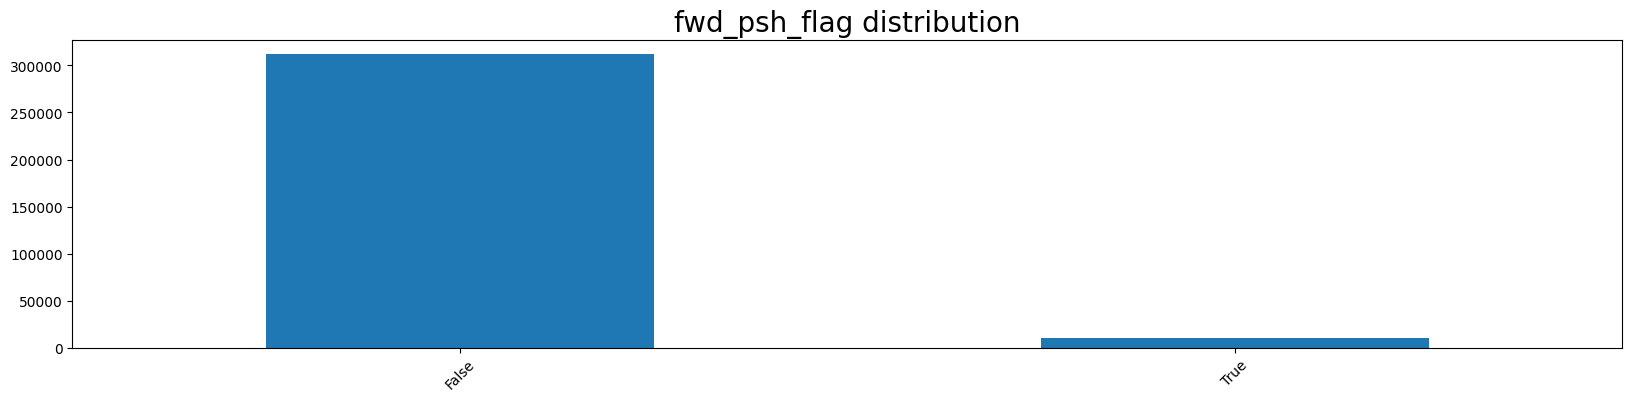

Column fwd_urg_flag
------------------------------
Unique Values (2): [False  True]

Value Counts:
False    322328
True          6
Name: fwd_urg_flag, dtype: int64



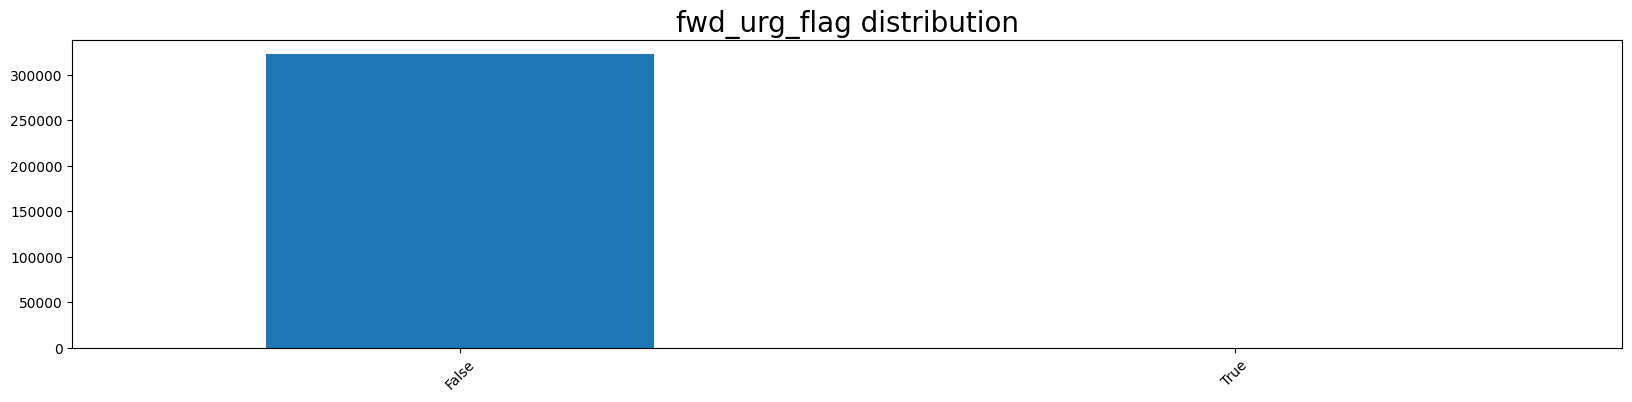

Column fin_flag_cnt
------------------------------
Unique Values (2): [False  True]

Value Counts:
False    300278
True      22056
Name: fin_flag_cnt, dtype: int64



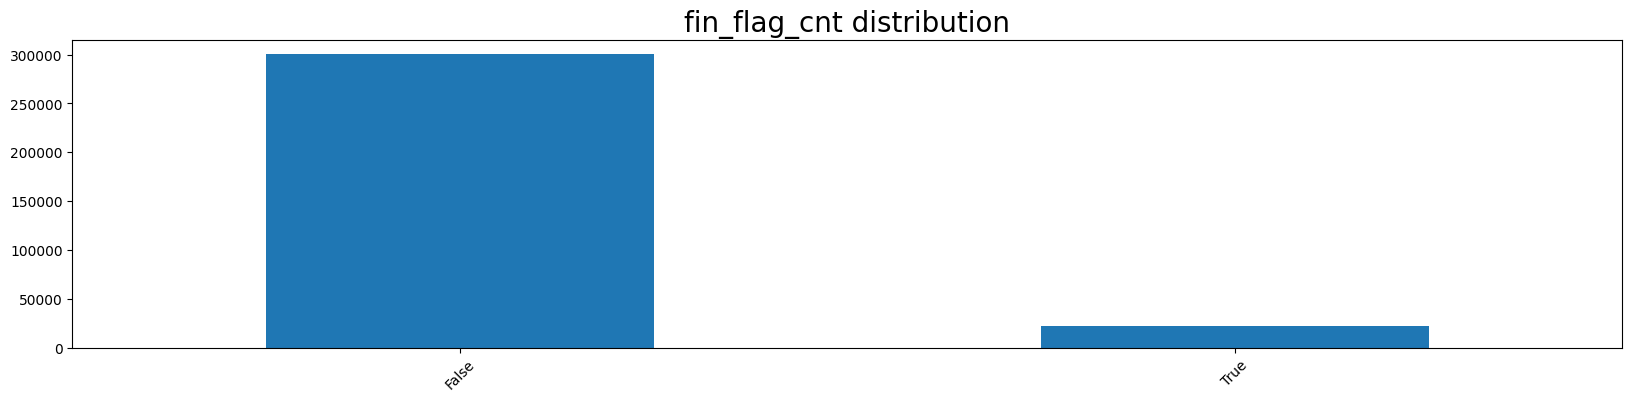

Column syn_flag_cnt
------------------------------
Unique Values (2): [False  True]

Value Counts:
False    311712
True      10622
Name: syn_flag_cnt, dtype: int64



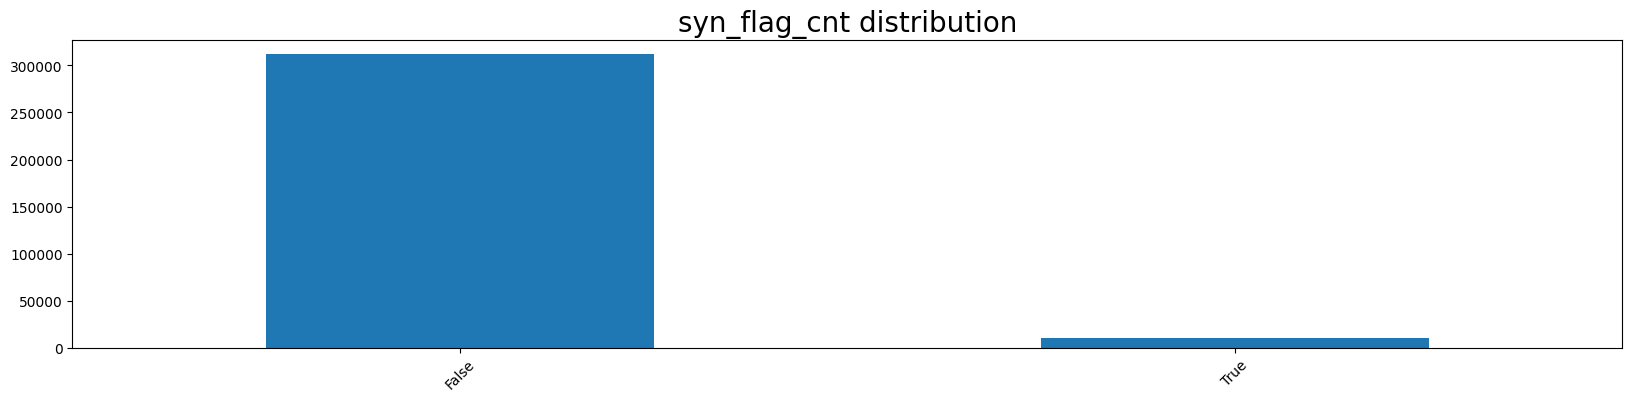

Column rst_flag_cnt
------------------------------
Unique Values (2): [False  True]

Value Counts:
False    322272
True         62
Name: rst_flag_cnt, dtype: int64



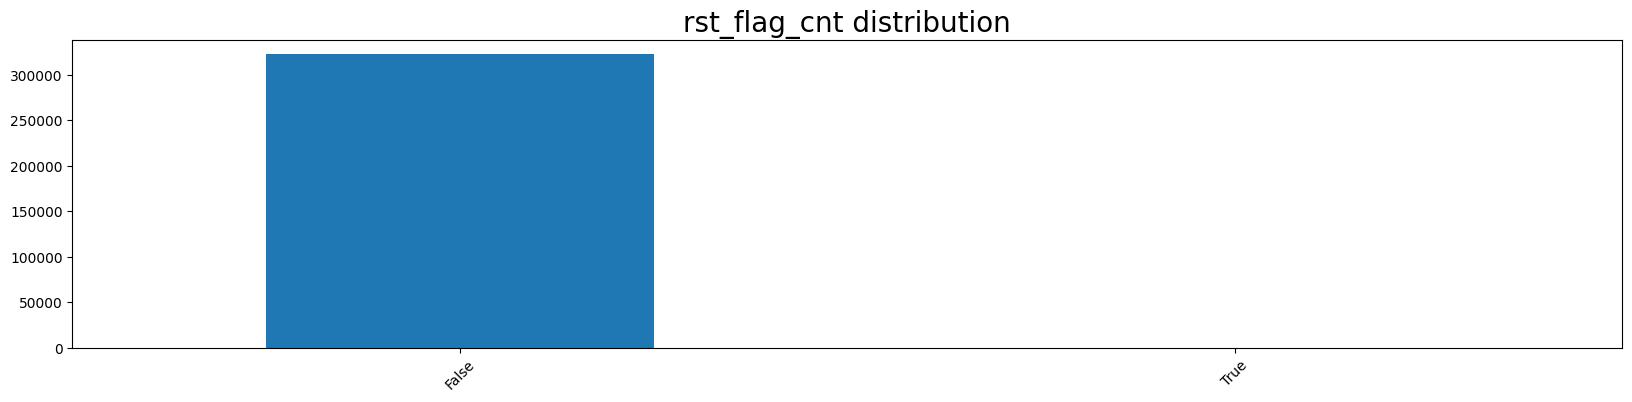

Column psh_flag_cnt
------------------------------
Unique Values (2): [False  True]

Value Counts:
False    233522
True      88812
Name: psh_flag_cnt, dtype: int64



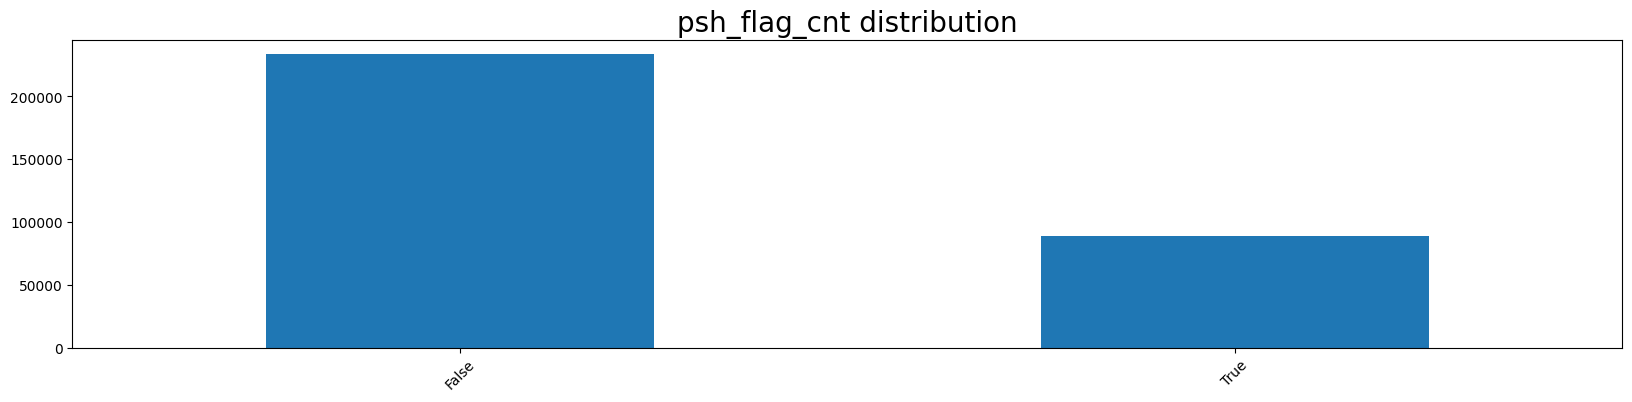

Column ack_flag_cnt
------------------------------
Unique Values (2): [False  True]

Value Counts:
False    204864
True     117470
Name: ack_flag_cnt, dtype: int64



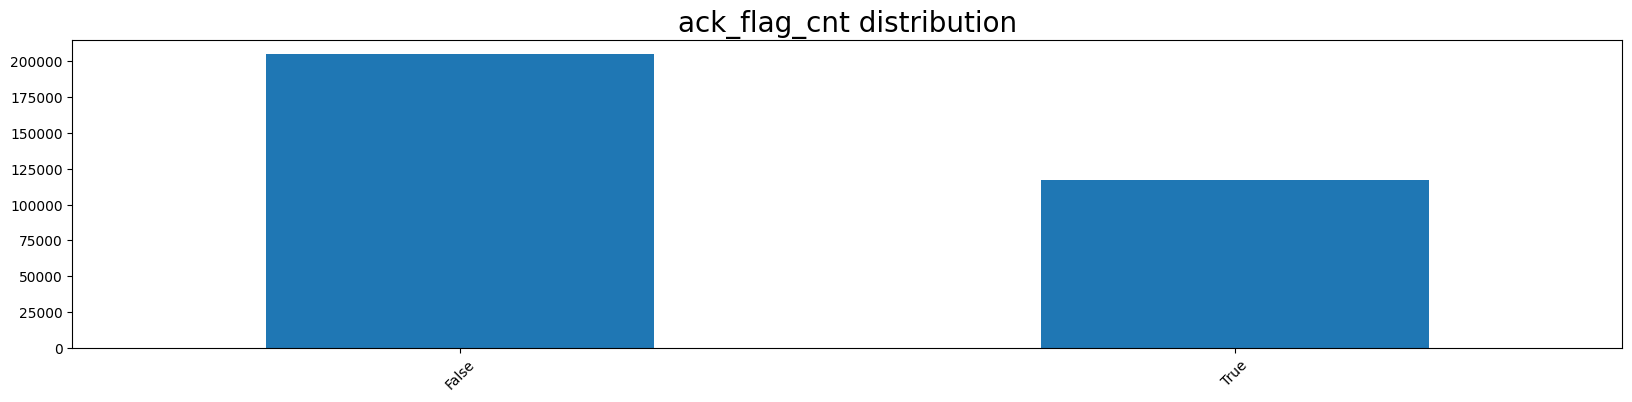

Column urg_flag_cnt
------------------------------
Unique Values (2): [False  True]

Value Counts:
False    298641
True      23693
Name: urg_flag_cnt, dtype: int64



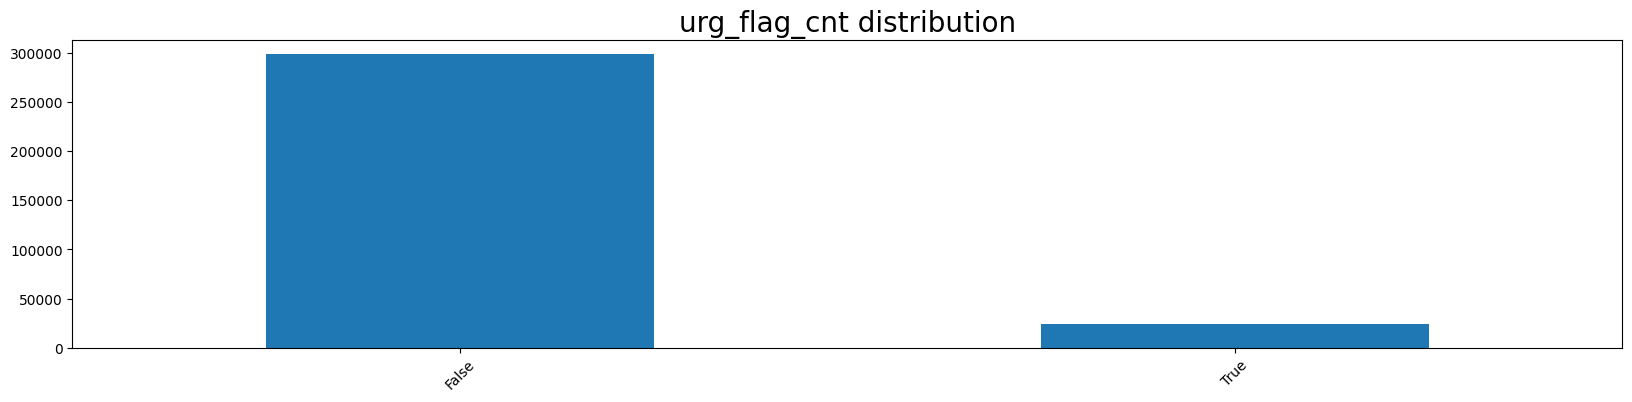

Column cwe_flag_cnt
------------------------------
Unique Values (2): [False  True]

Value Counts:
False    322328
True          6
Name: cwe_flag_cnt, dtype: int64



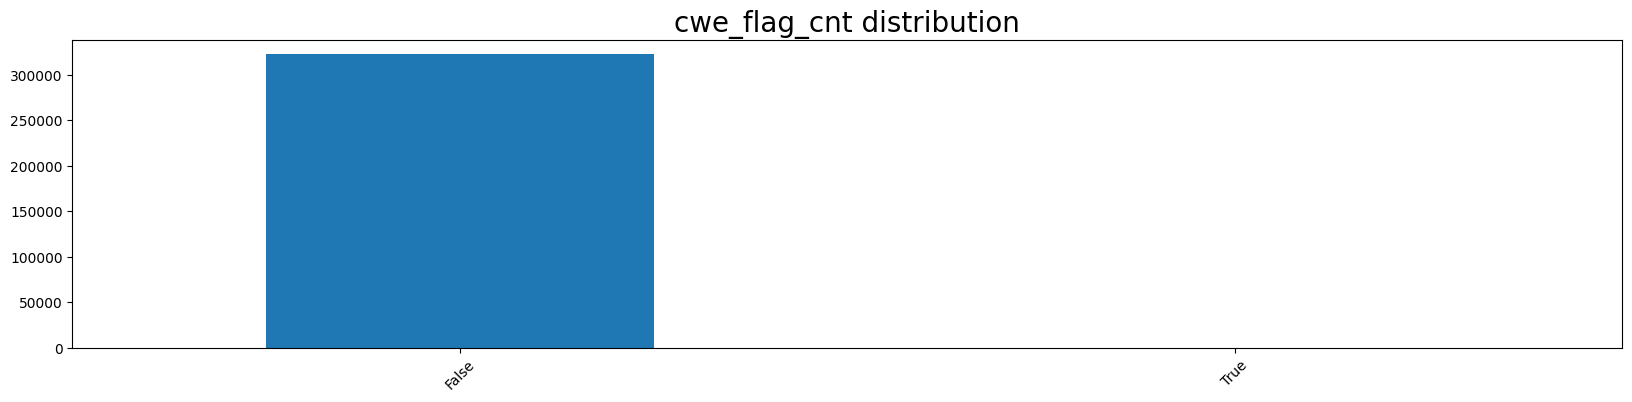

Column ece_flag_cnt
------------------------------
Unique Values (2): [False  True]

Value Counts:
False    322272
True         62
Name: ece_flag_cnt, dtype: int64



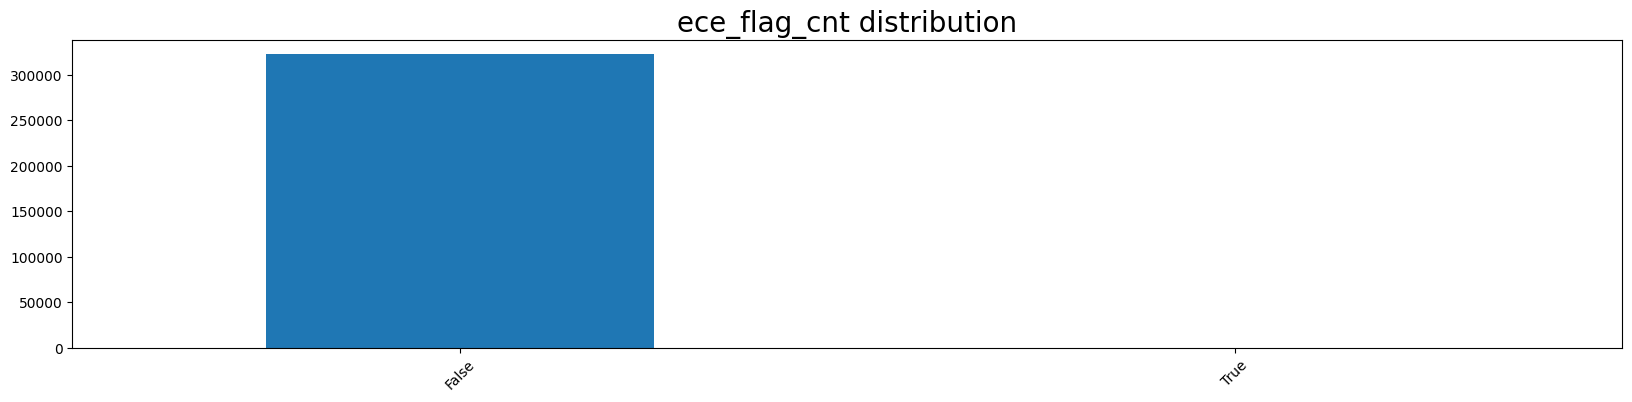

Column attack_type
------------------------------
Unique Values (14): ['benign' 'dos_hulk' 'portscan' 'ddos' 'dos_slowhttptest' 'dos_slowloris'
 'ssh_patator' 'dos_goldeneye' 'ftp_patator' 'webattack_bruteforce' 'bot'
 'webattack_xss' 'webattack_sql_injection' 'heartbleed']

Value Counts:
benign                     201002
dos_hulk                    60215
ddos                        47838
dos_goldeneye                3381
dos_slowloris                2653
dos_slowhttptest             2330
ftp_patator                  1602
portscan                     1101
ssh_patator                   892
webattack_bruteforce          678
webattack_xss                 326
bot                           305
webattack_sql_injection         6
heartbleed                      5
Name: attack_type, dtype: int64



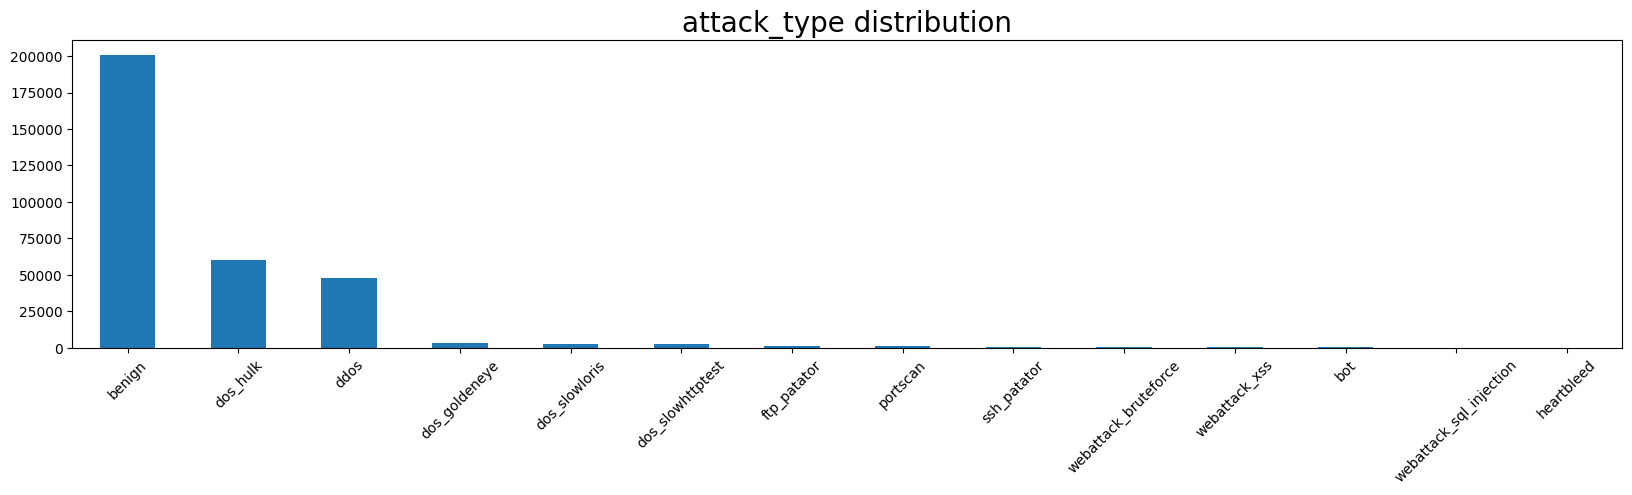

Column attack
------------------------------
Unique Values (2): [False  True]

Value Counts:
False    201002
True     121332
Name: attack, dtype: int64



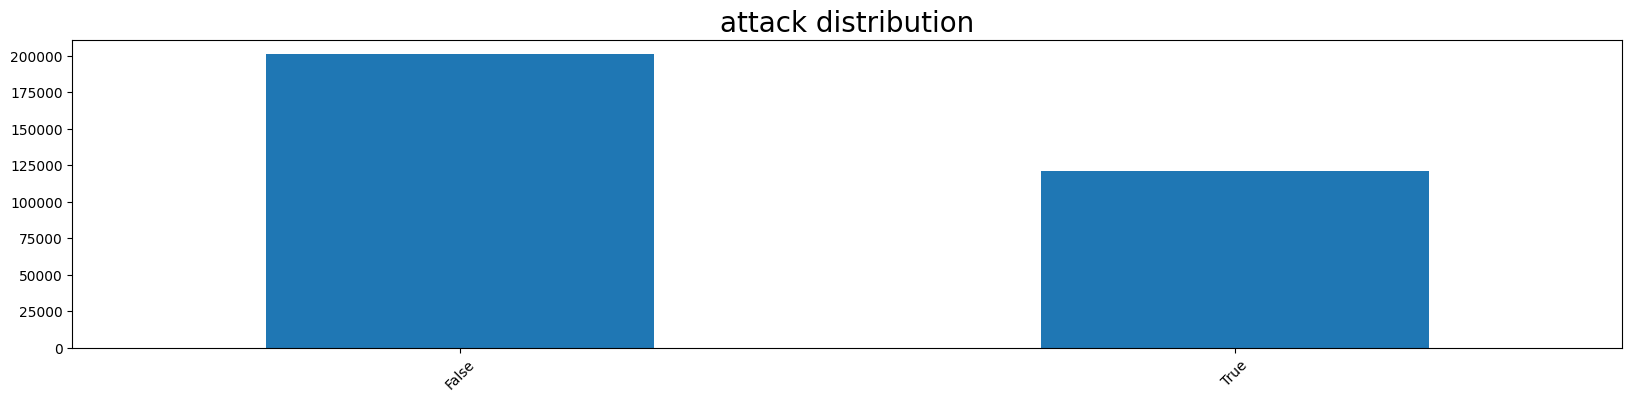

In [9]:
# Non-numerical columns
non_numerical_columns = train_df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Show the distribution for each one
for column_name in non_numerical_columns:
    print(f"Column {column_name}\n{'-'*30}")
    unique_vals = train_df[column_name].unique()
    value_counts = train_df[column_name].value_counts()
    print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
    print(f"Value Counts:\n{value_counts}\n{'='*40}\n")
    plt.figure(figsize=(20,4))
    value_counts.plot(kind="bar")
    plt.title(f"{column_name} distribution", fontsize=20)
    plt.xticks(rotation=45)
    plt.show()

Violin plot for each numerical feature

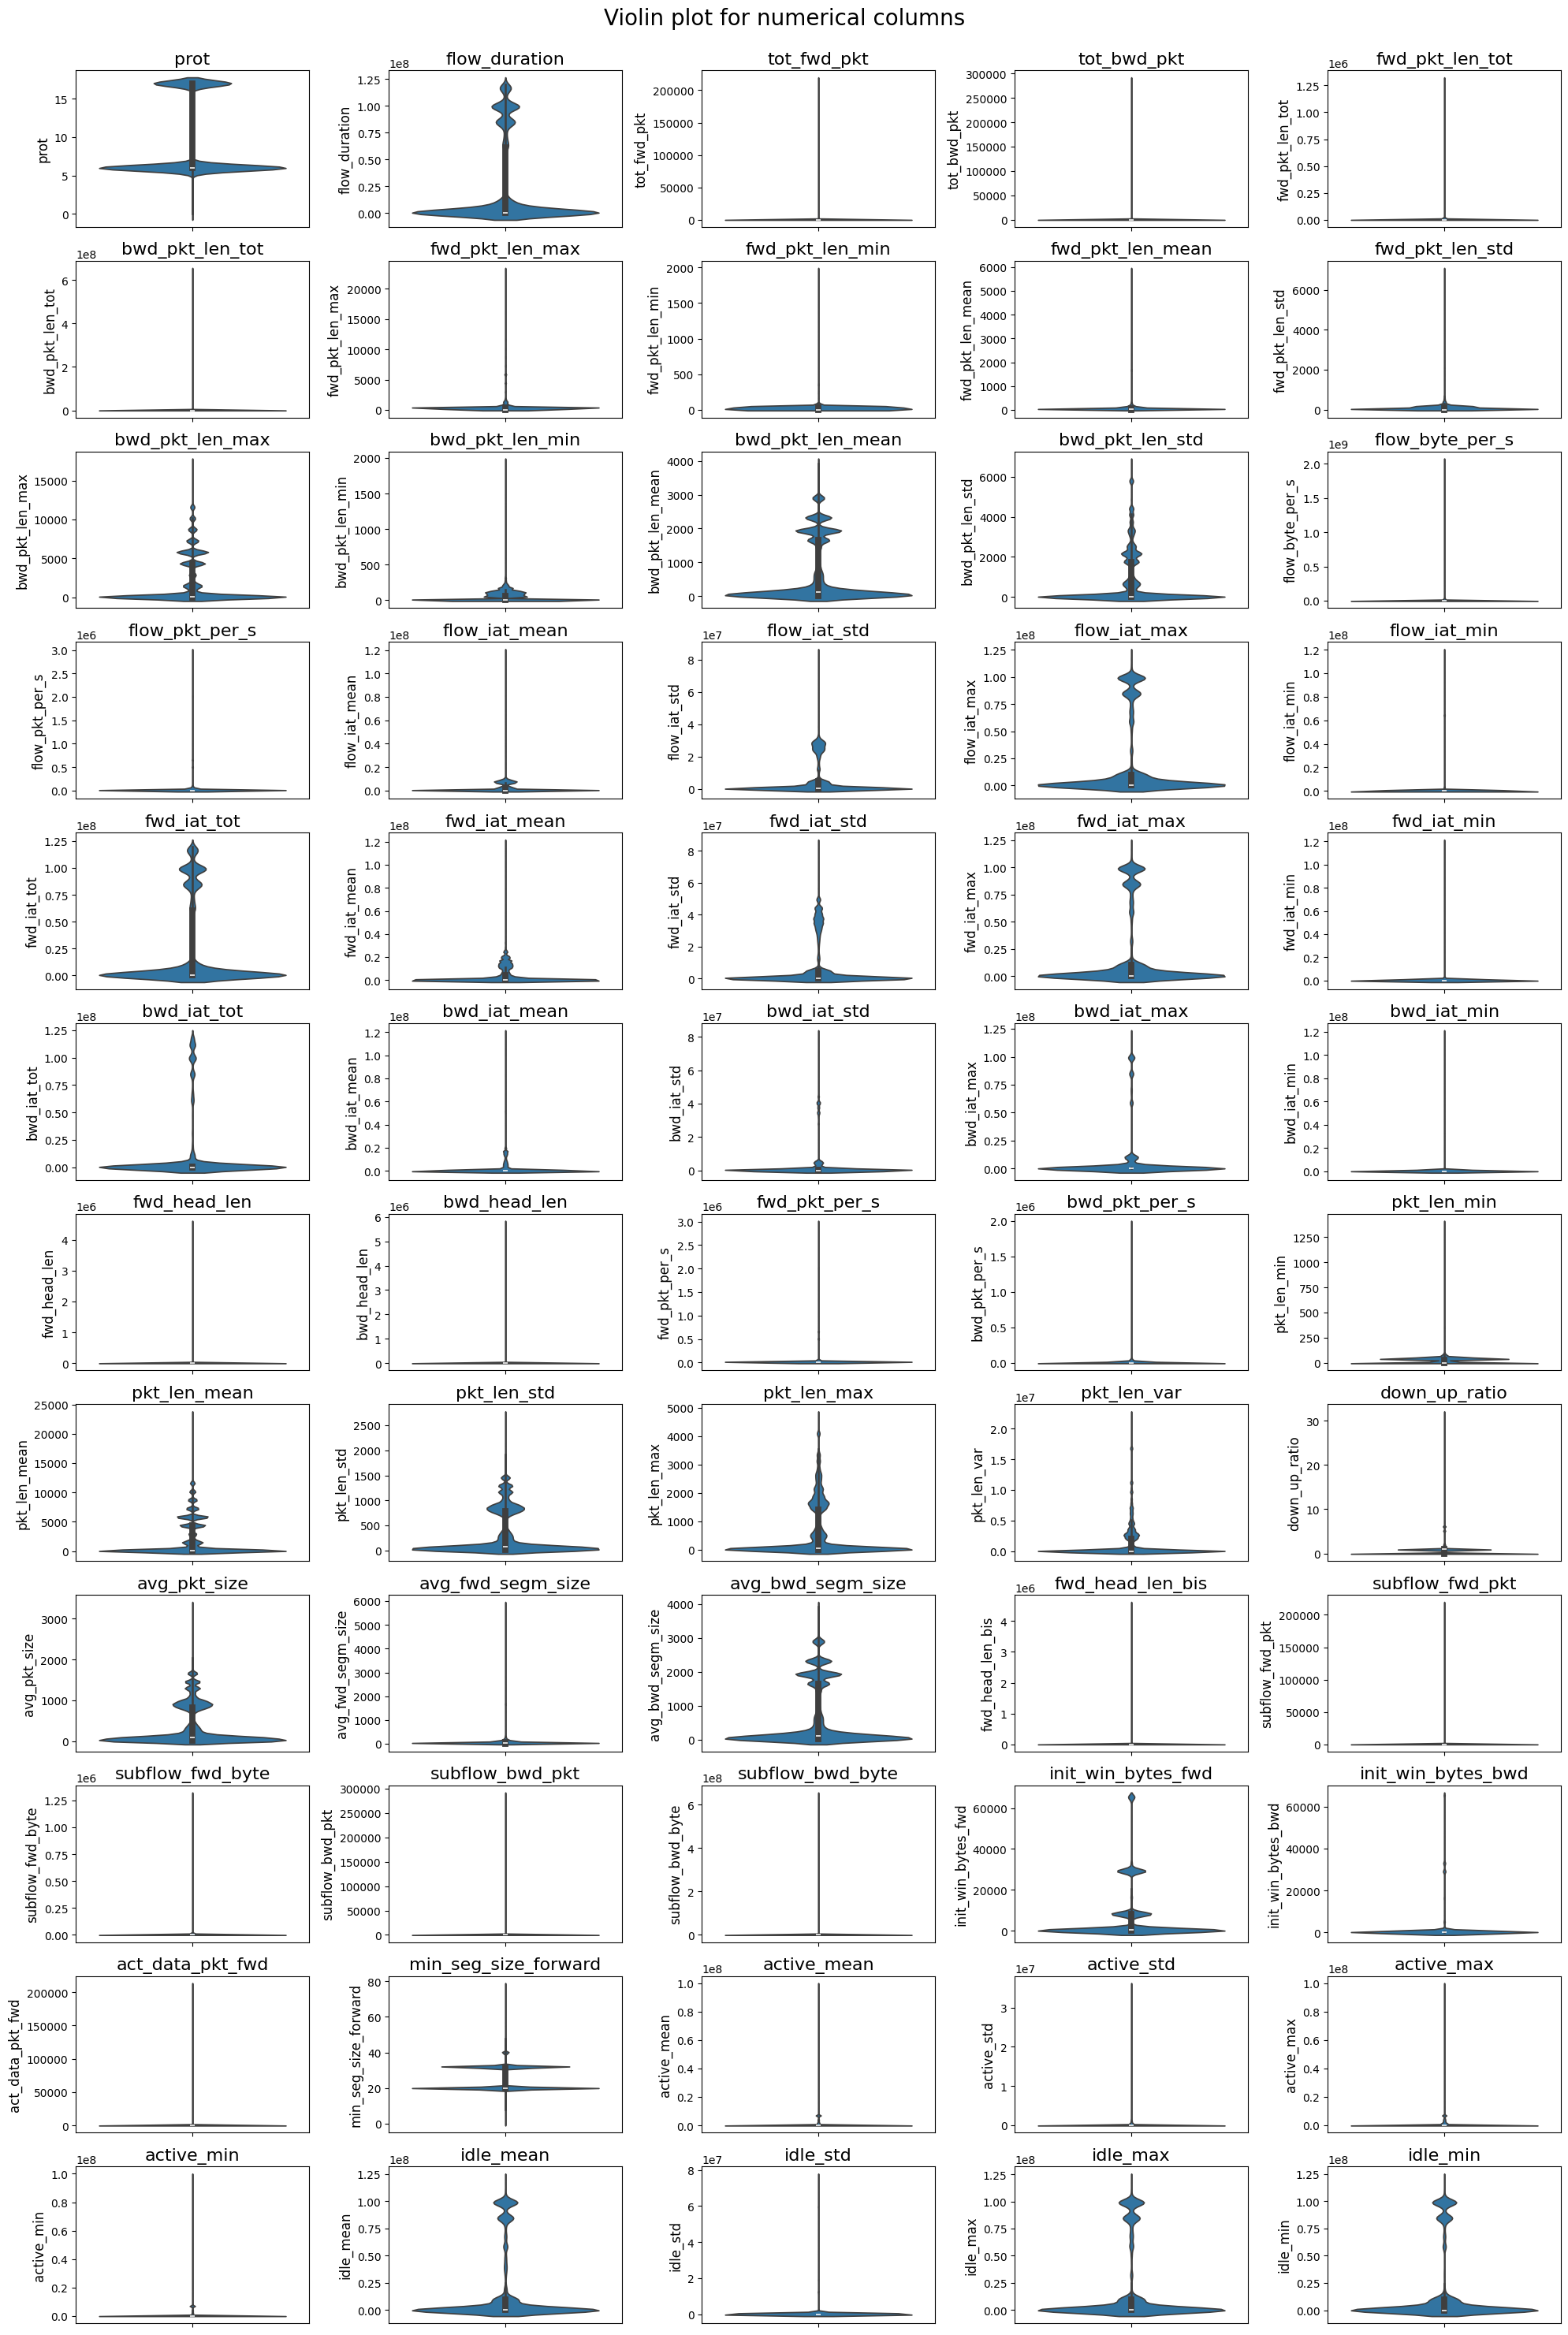

In [10]:
# Numerical columns
numerical_columns = train_df.select_dtypes(exclude=['object', 'category', 'bool']).columns.tolist()

# Create subplots for violin plots
fig, axes = plt.subplots(16, 5, figsize=(20, 40))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Generate a violin plot for each numerical column
for i, col in enumerate(numerical_columns):
    sns.violinplot(data=train_df, y=col, ax=axes[i])
    axes[i].set_title(col, fontsize=16)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col, fontsize=12)

# Remove any extra subplots
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Violin plot for numerical columns', fontsize=20)
plt.subplots_adjust(top=0.96)
plt.show()

Semi-log histogram for each numerical feature

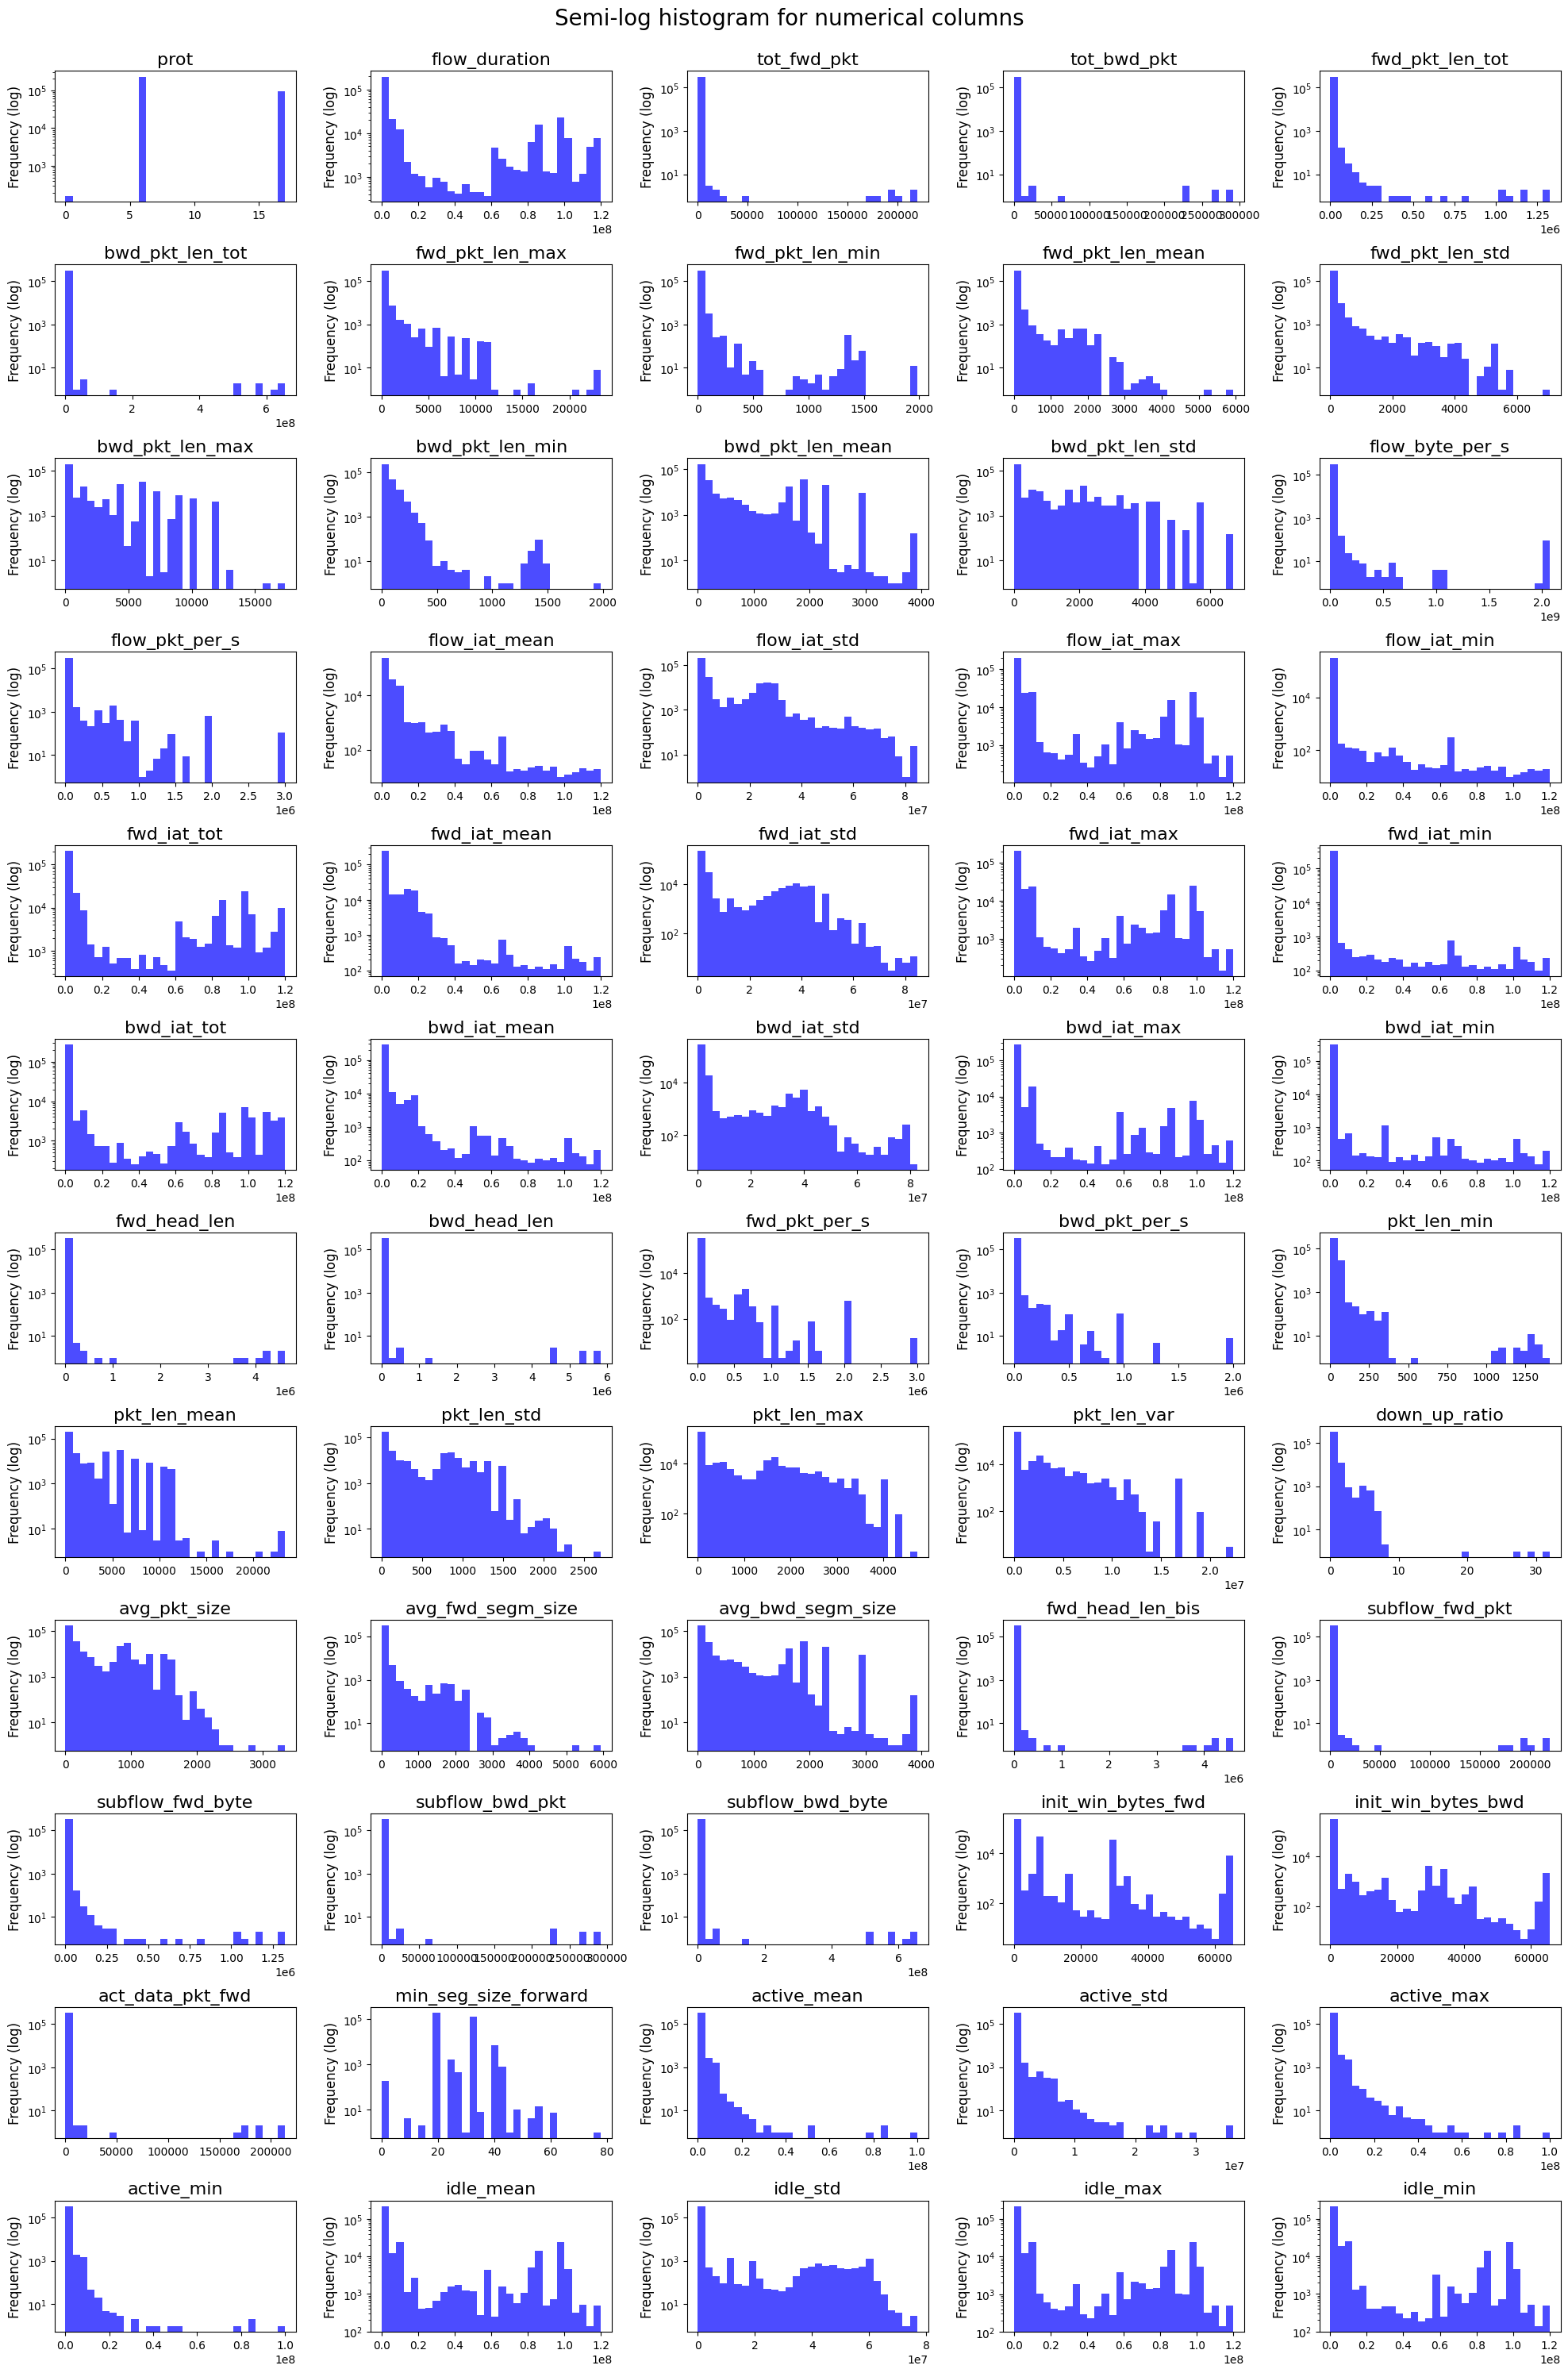

In [11]:
# Create subplots for semi-log histograms
fig, axes = plt.subplots(16, 5, figsize=(20, 40))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Generate a semi-log histogram for each numerical column
for i, col in enumerate(numerical_columns):
    axes[i].hist(train_df[col], bins=30, log=True, color='blue', alpha=0.7)
    axes[i].set_title(col, fontsize=16)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency (log)', fontsize=12)

# Remove any extra subplots
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Semi-log histogram for numerical columns', fontsize=20)
plt.subplots_adjust(top=0.96)
plt.show()

Plot the distributions of Attack and Attack Types with percentages

In [12]:
def plot_distribution_with_percentages(col_name):
    plt.figure(figsize=(20, 8))
    ax = sns.countplot(data=train_df, x=col_name, hue=col_name, legend=False)
    total = len(train_df)
    for p in ax.patches:
        count = int(p.get_height())
        percentage = 100 * count / total
        if percentage > 0:
            ax.annotate(f'{count} ({percentage:.1f}%)', (p.get_x() + p.get_width() / 2., p.get_height() * 0.985), 
                    ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5), 
                    textcoords='offset points')

    plt.title(f"Distribution of {col_name} with percentages", fontsize=20)
    plt.xlabel(col_name)
    plt.ylabel("Count")
    plt.show()

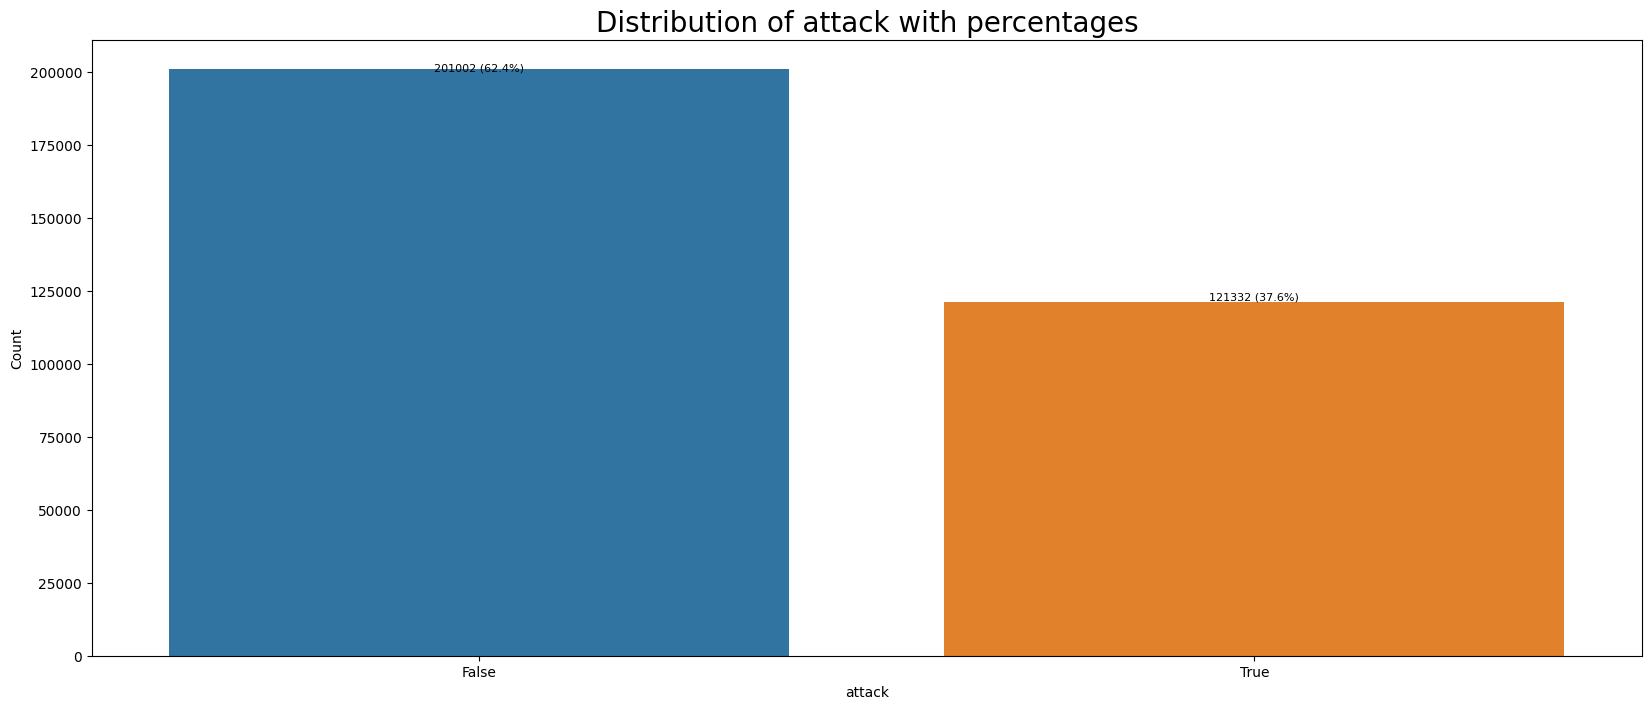

In [13]:
# Distribution of Attack with percentages
plot_distribution_with_percentages('attack')

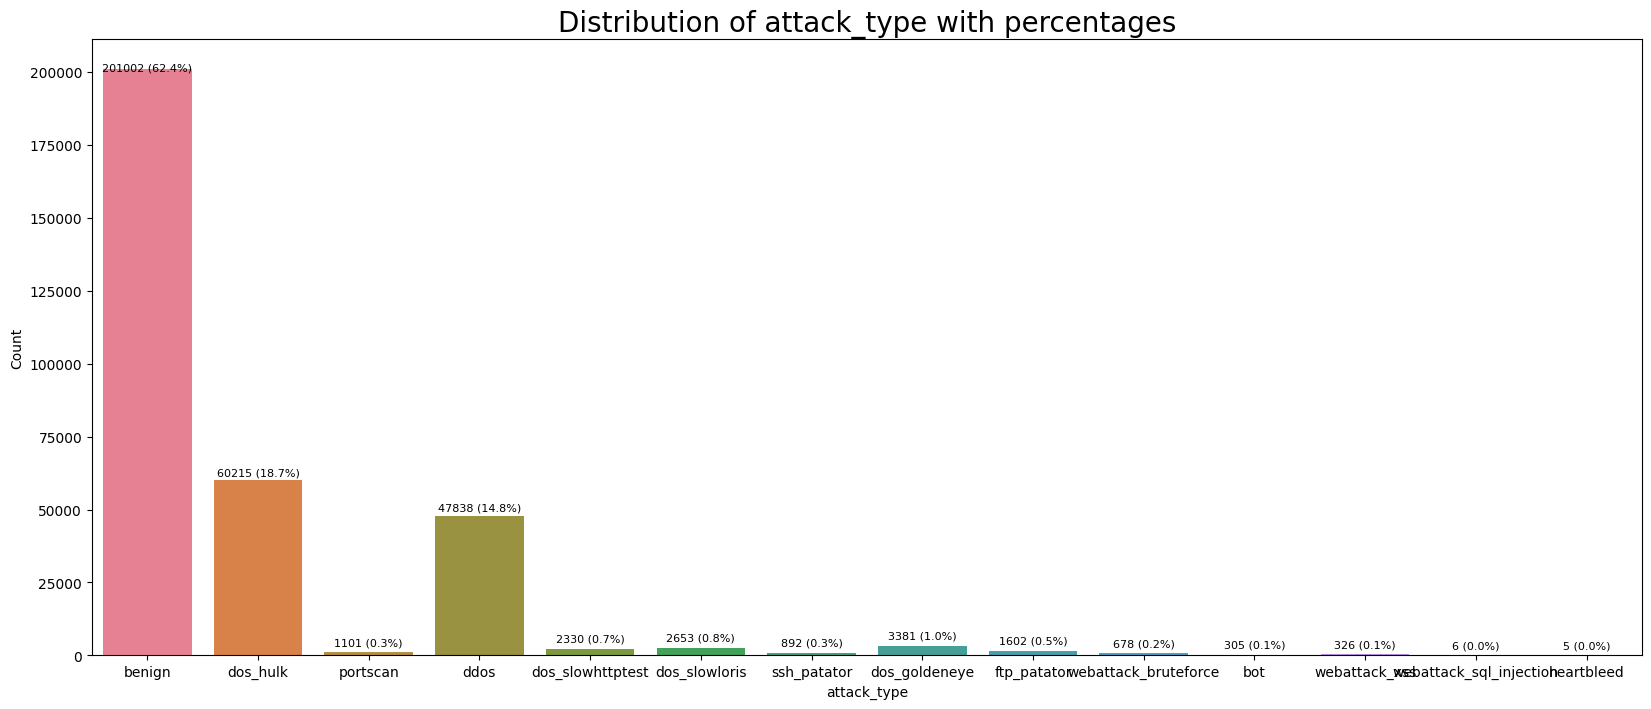

In [14]:
# Distribution of Attack Type with percentages
plot_distribution_with_percentages('attack_type')

### Covariate Analysis

In [15]:
# Compare column vs column
def hist_col_vs_col(col1, col2, top_n=10):
    # Get the top N categories by count in col2, to avoid a huge plot
    top_categories = train_df[col2].value_counts().head(top_n).index
    filtered_df = train_df[train_df[col2].isin(top_categories)]
    
    # Set dynamic title
    title_suffix = f" (top {top_n} for {col2})" if train_df[col2].nunique() > top_n else ""
    title = f'{col1} vs {col2}{title_suffix}'
    
    plt.figure(figsize=(20, 8))
    sns.countplot(x=col1, data=filtered_df, hue=col2, palette=sns.color_palette("dark", as_cmap=False, n_colors=filtered_df[col2].nunique()))
    plt.xticks(rotation=45)
    plt.title(title, fontsize=20)
    plt.legend(title=col2)
    plt.show()

Compare Attack vs Protocol Number

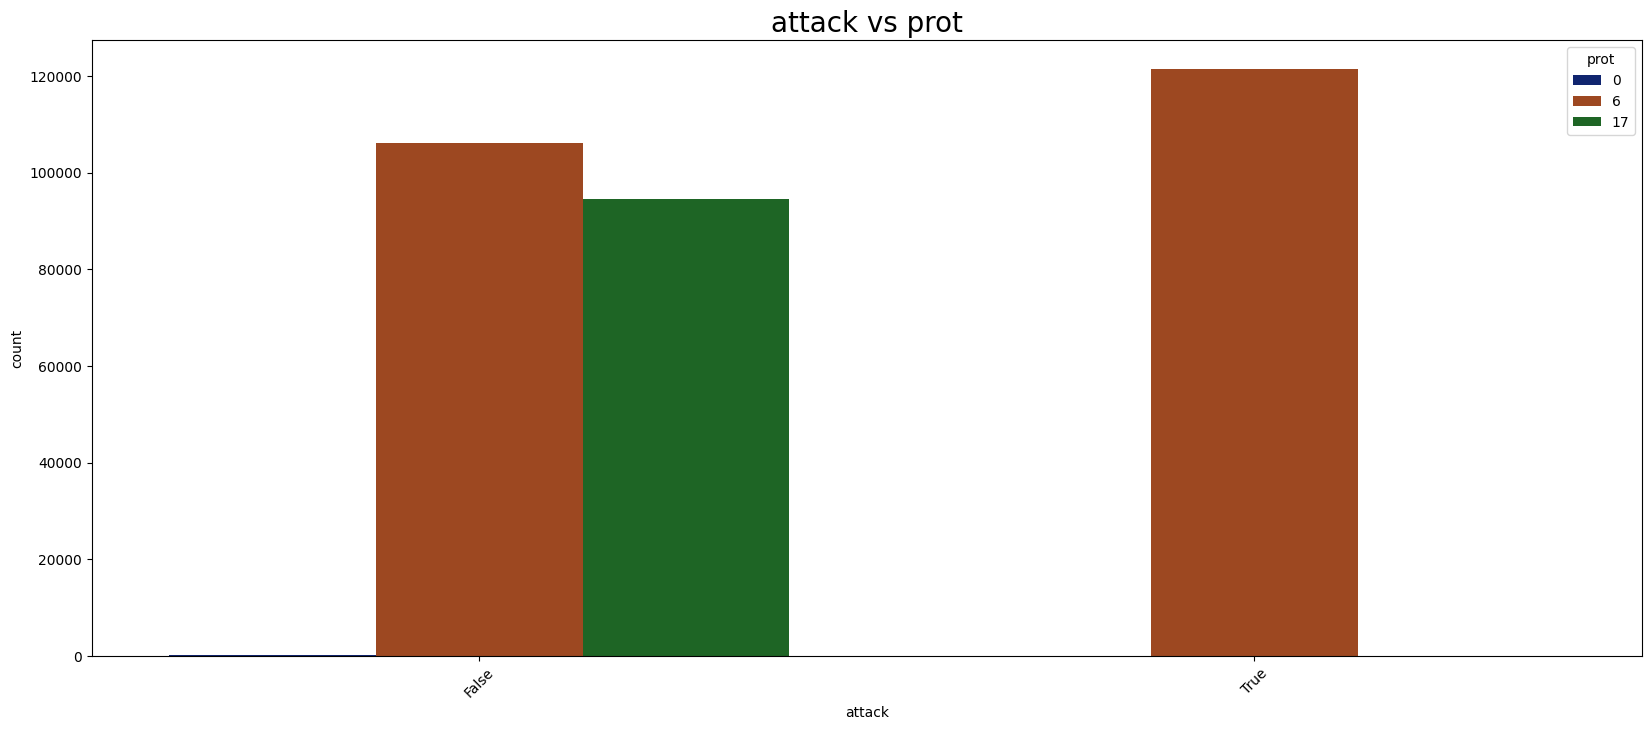

In [16]:
hist_col_vs_col('attack', 'prot')

Compare Attack Type vs Protocol Number

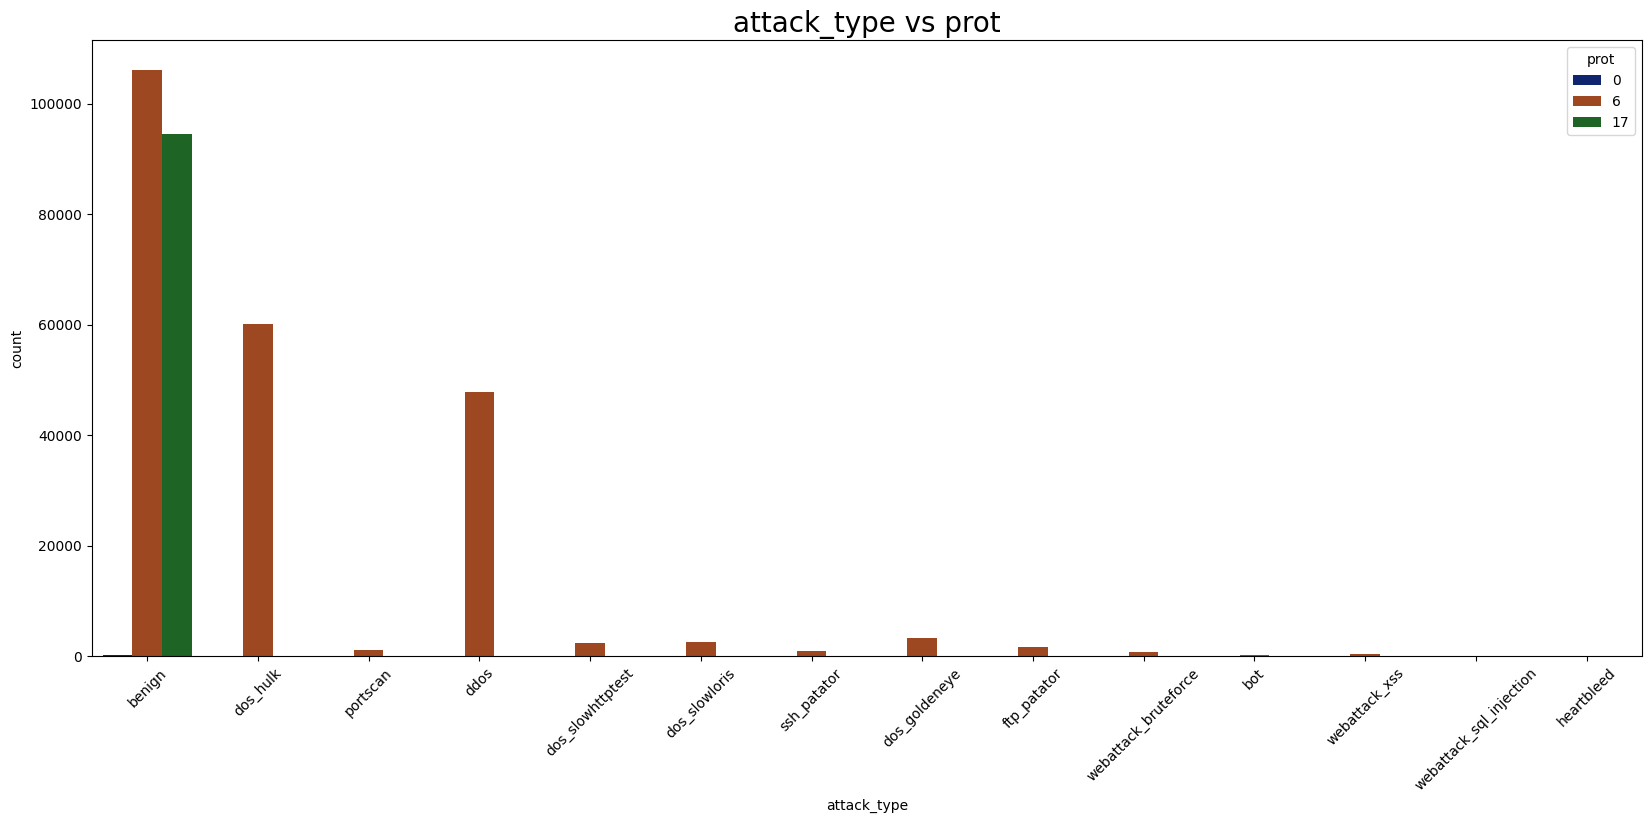

In [17]:
hist_col_vs_col('attack_type', 'prot')

Compare Flag SYN vs Attack

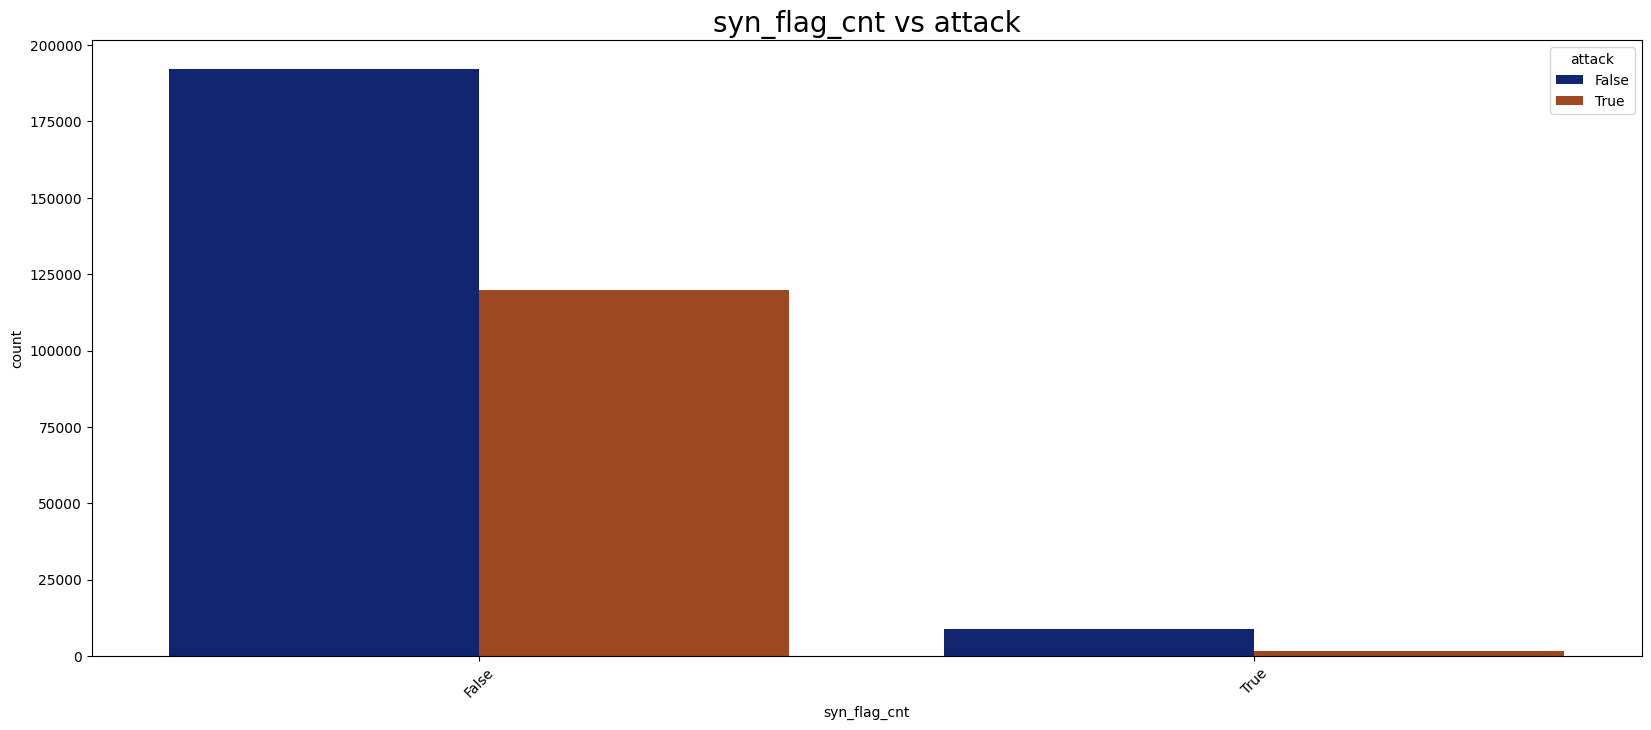

In [18]:
hist_col_vs_col('syn_flag_cnt', 'attack')

Correlation matrix, useful for finding very correlated features

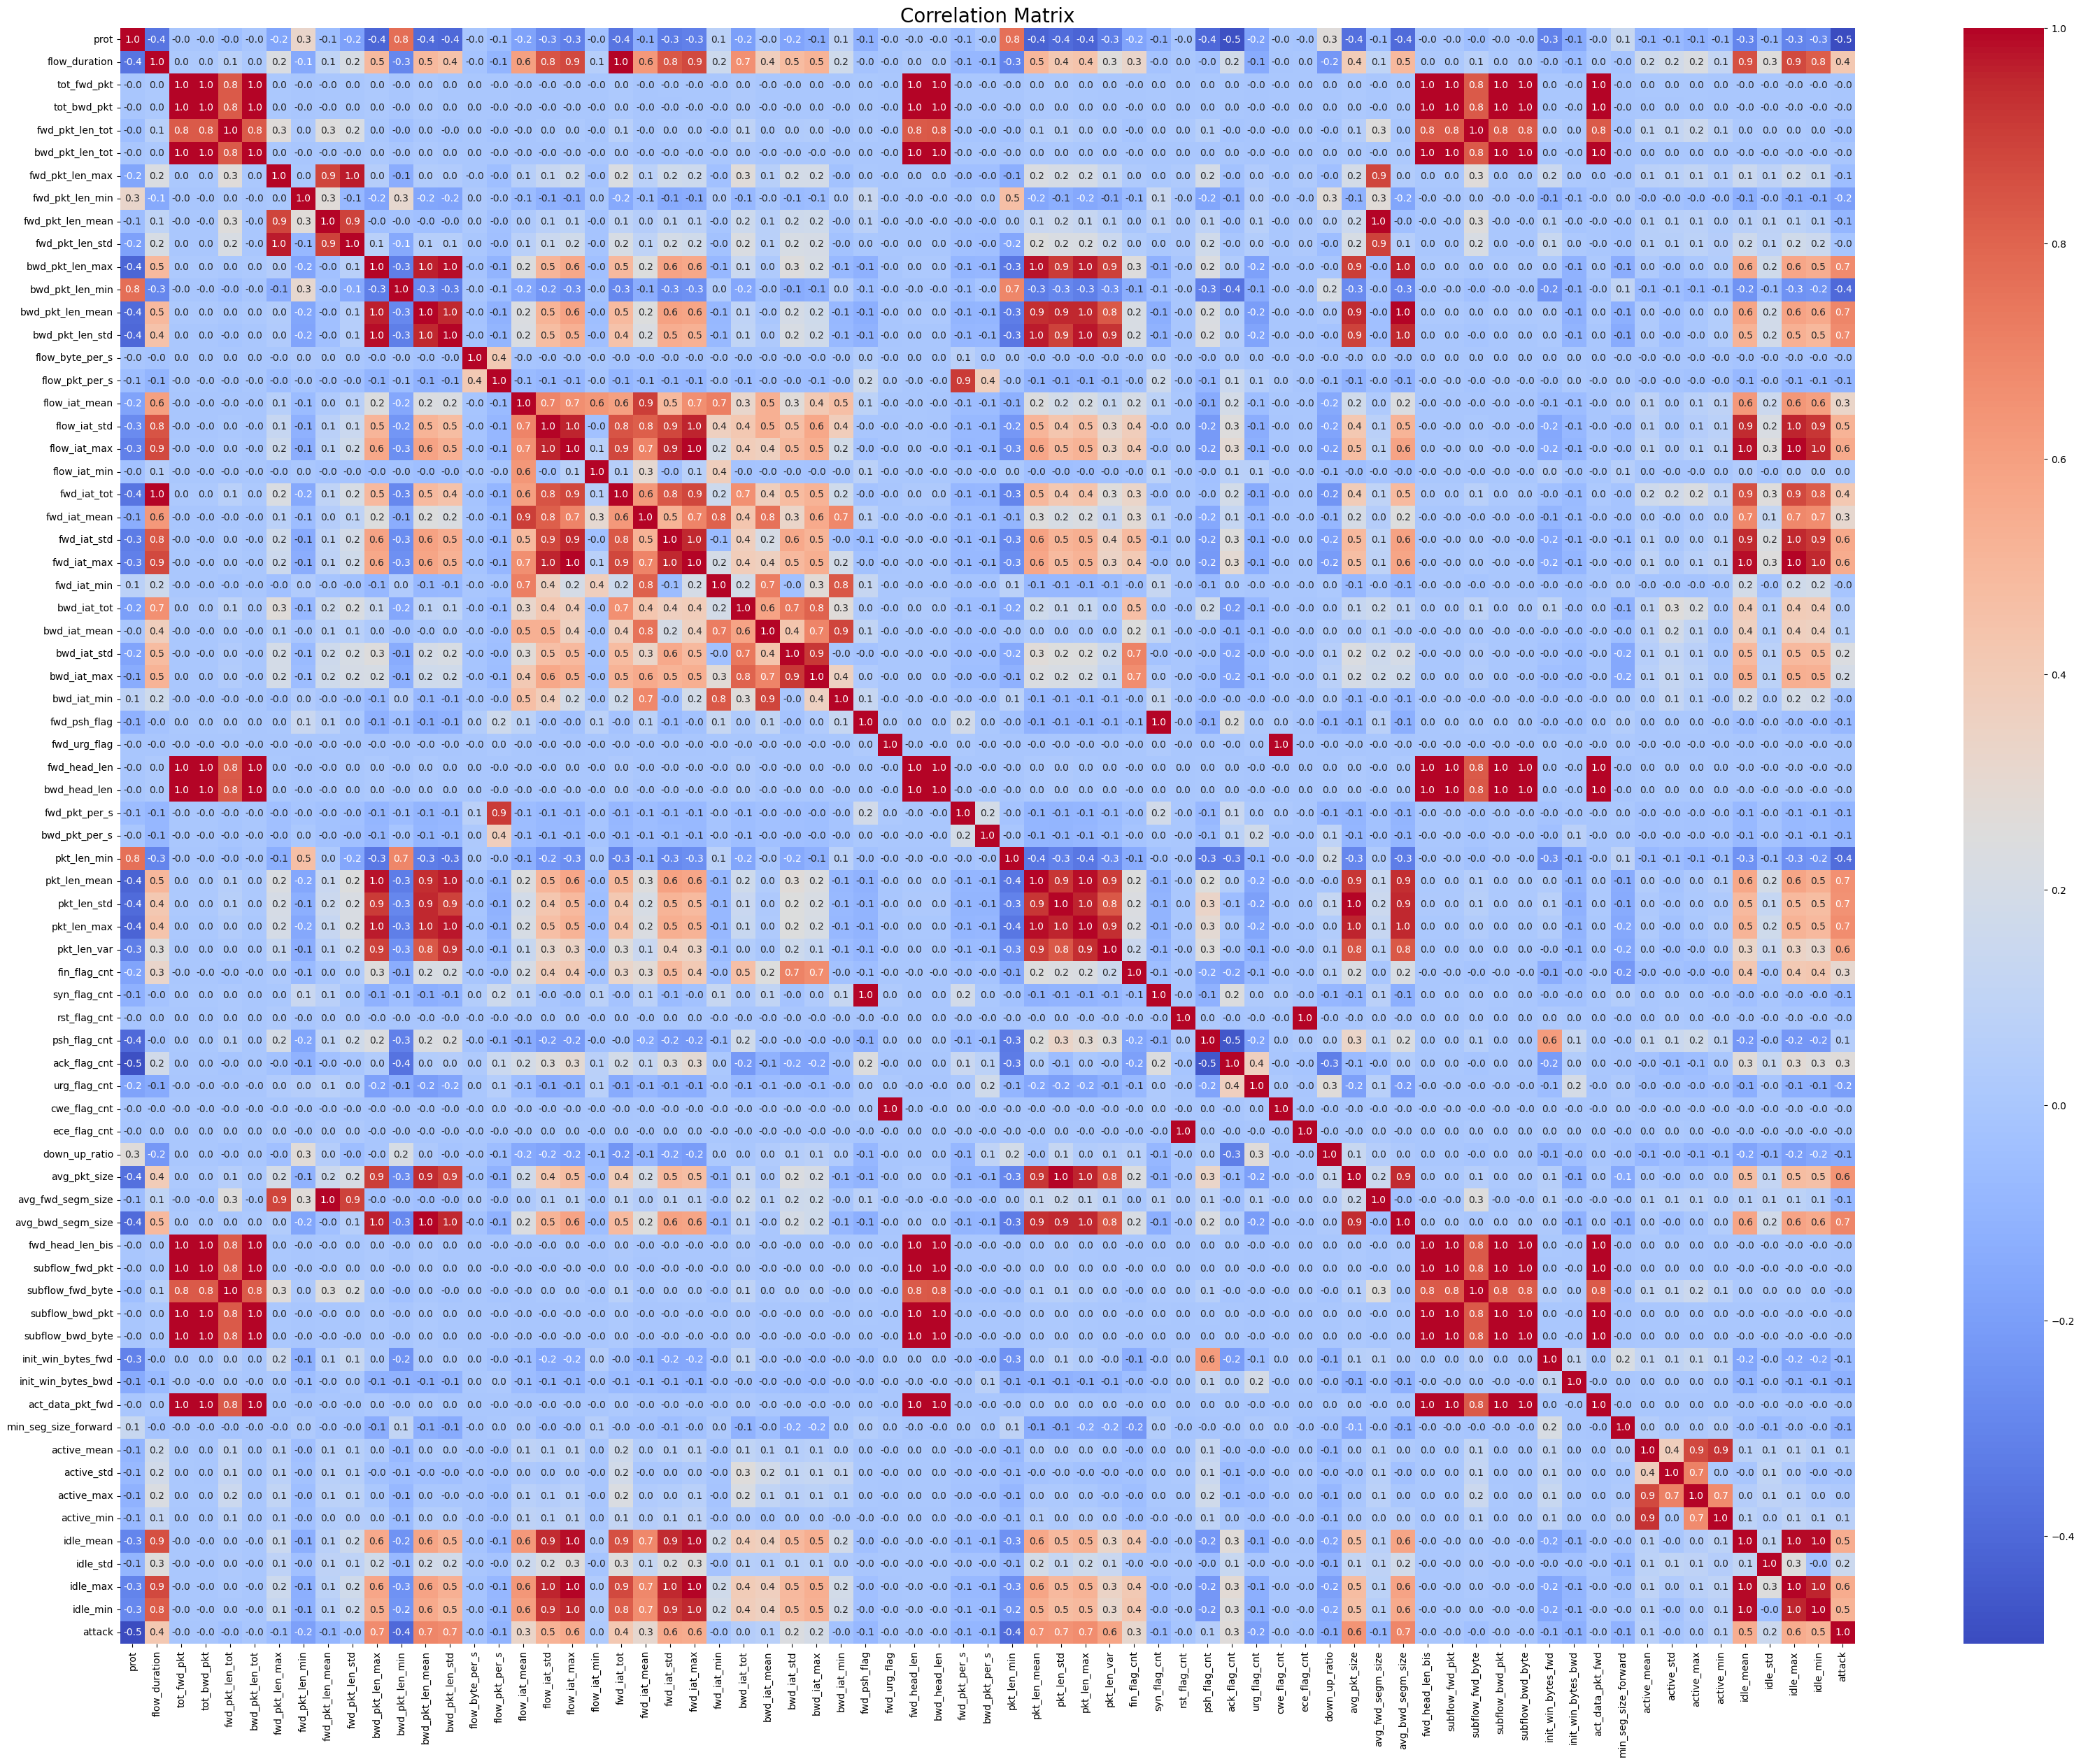

In [19]:
plt.figure(figsize=(40, 30))
correlation_matrix = train_df[train_df.select_dtypes(exclude=['object', 'category']).columns.tolist()].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", annot_kws={"size": 10})
plt.title("Correlation Matrix", fontsize=20)
plt.show()

Compare the subset of most correlated (|corr| > 0.5) features vs Attack

In [20]:
def compare_feature_target(feature_name):
    # Set up the plotting area with only two columns for histogram and violin plot
    _, axes = plt.subplots(1, 2, figsize=(14, 3))

    # Histogram
    sns.histplot(train_df[feature_name], kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title(f"Histogram of {feature_name}", fontsize=20)
    axes[0].set_xlabel(feature_name)

    # Violin plot colored by Attack
    sns.violinplot(data=train_df, x='attack', y=feature_name, hue='attack', ax=axes[1])
    axes[1].set_title(f"Violin Plot of {feature_name} by Attack", fontsize=20)
    axes[1].get_legend().remove()

    plt.tight_layout()
    plt.show()

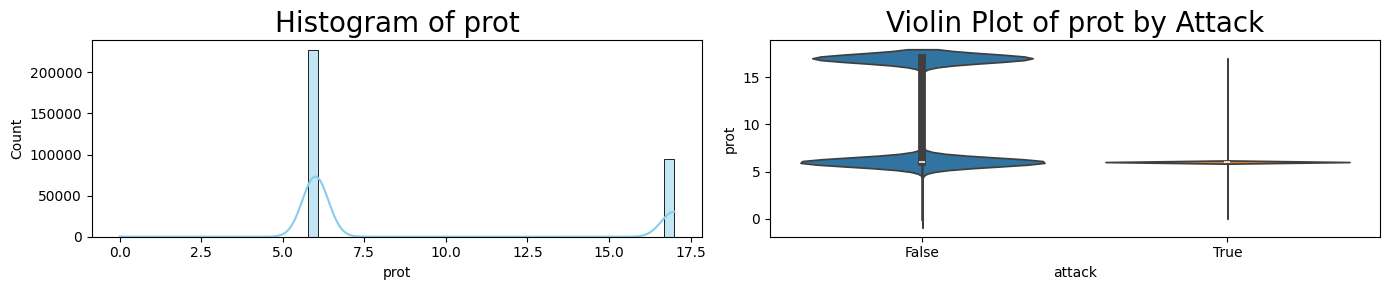

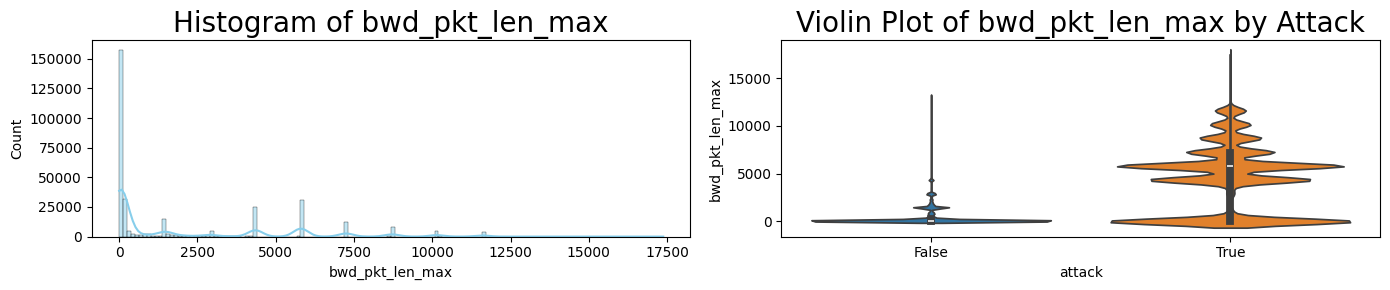

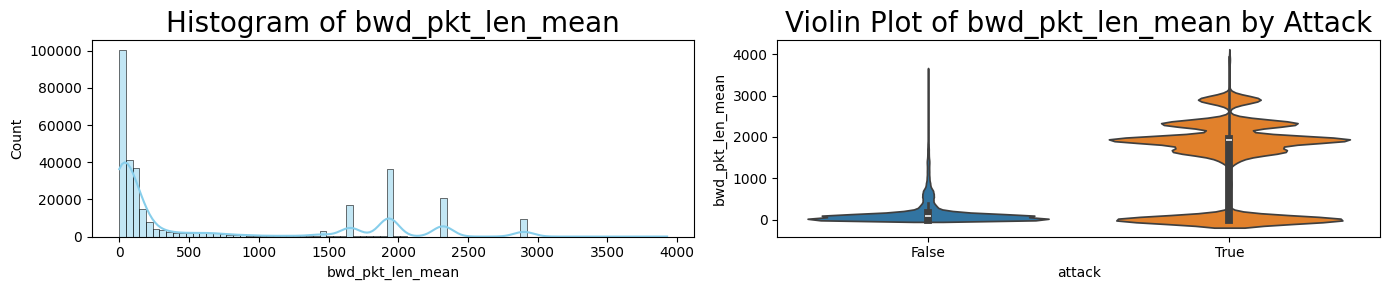

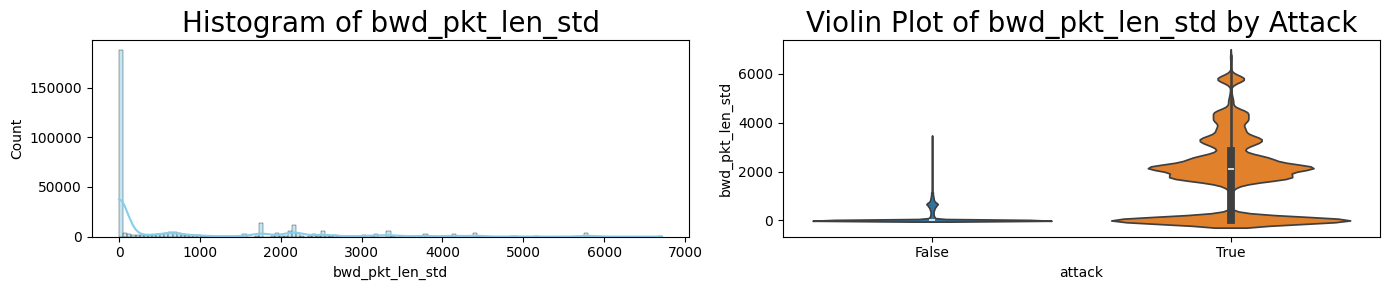

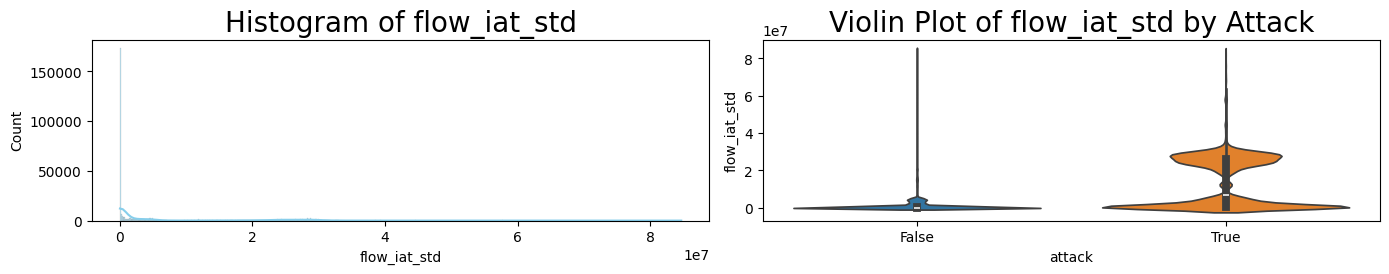

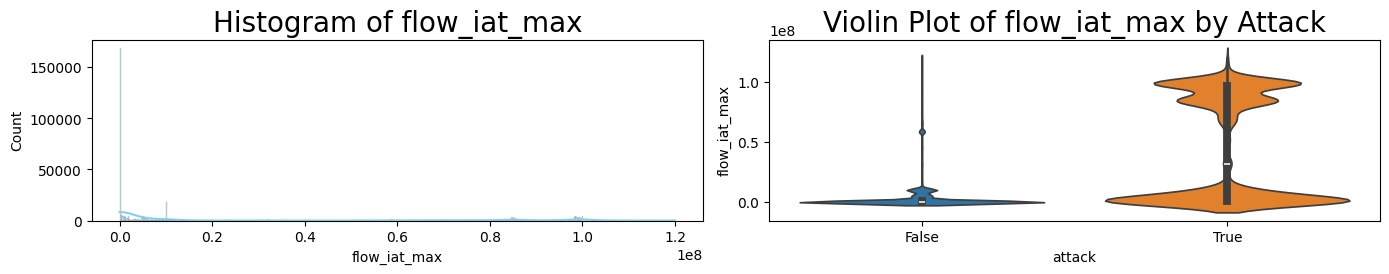

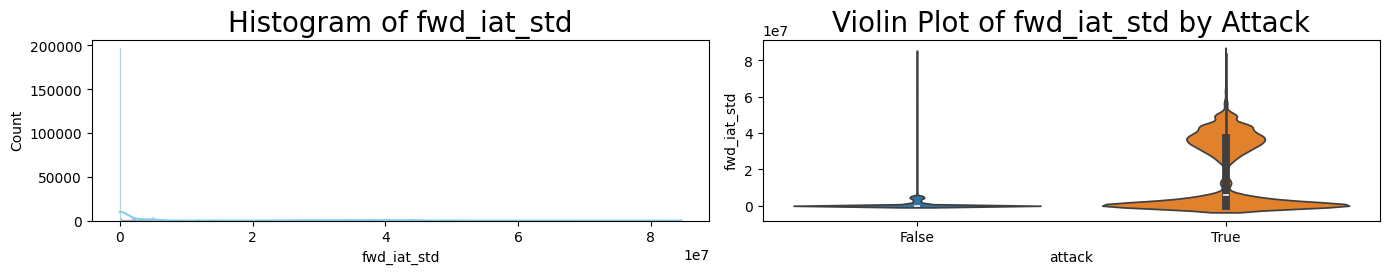

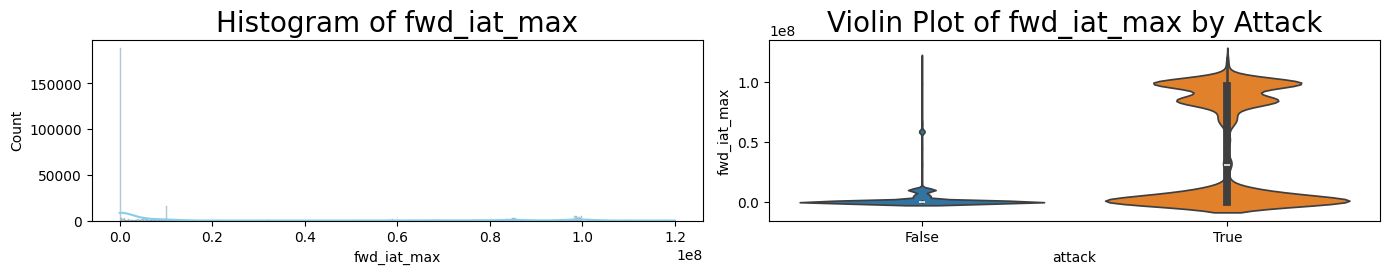

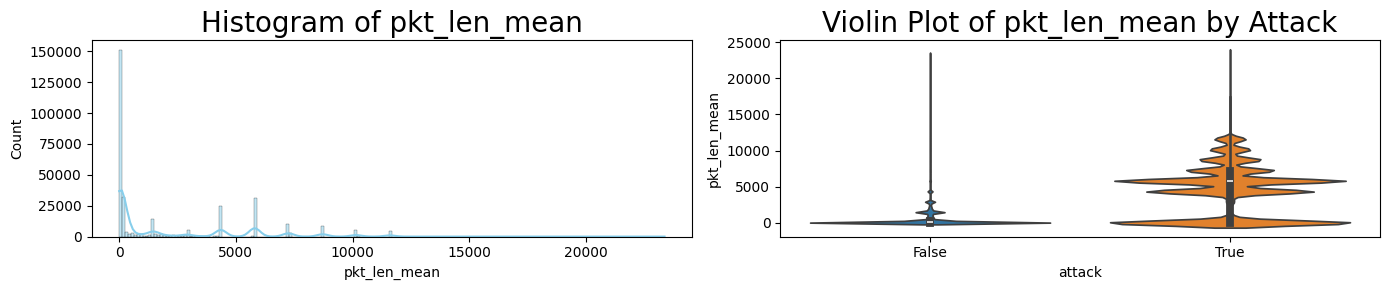

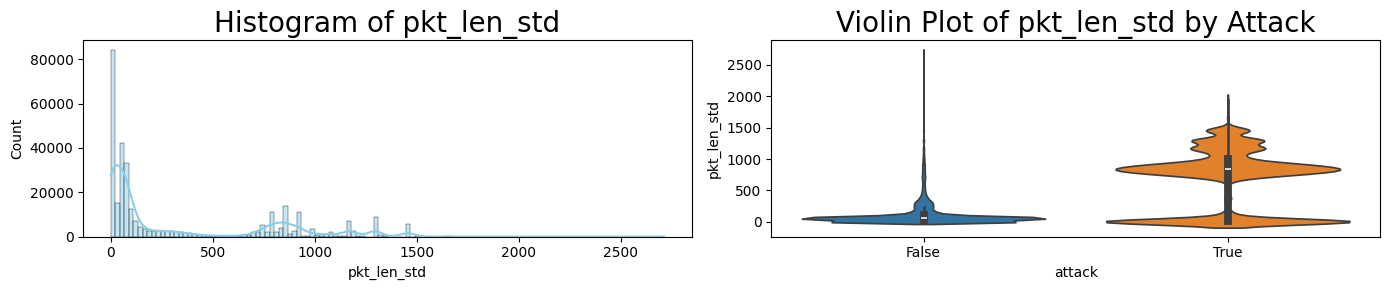

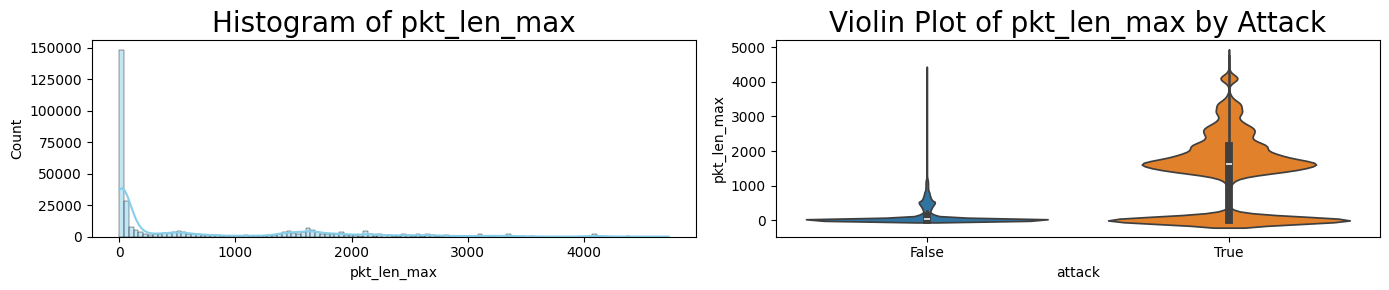

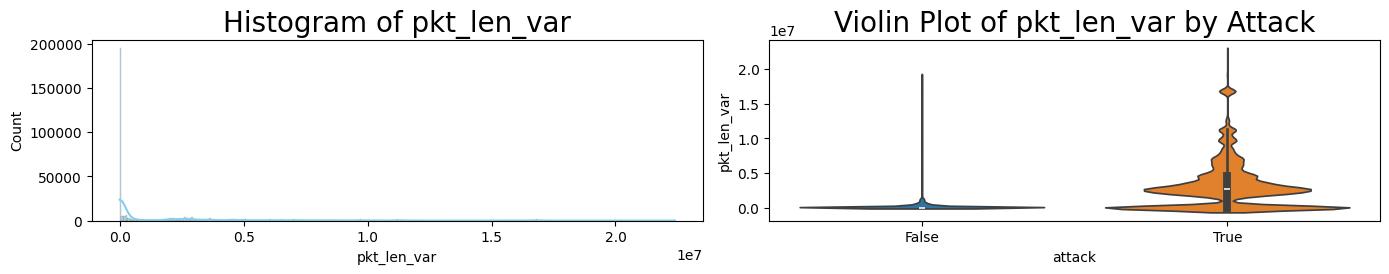

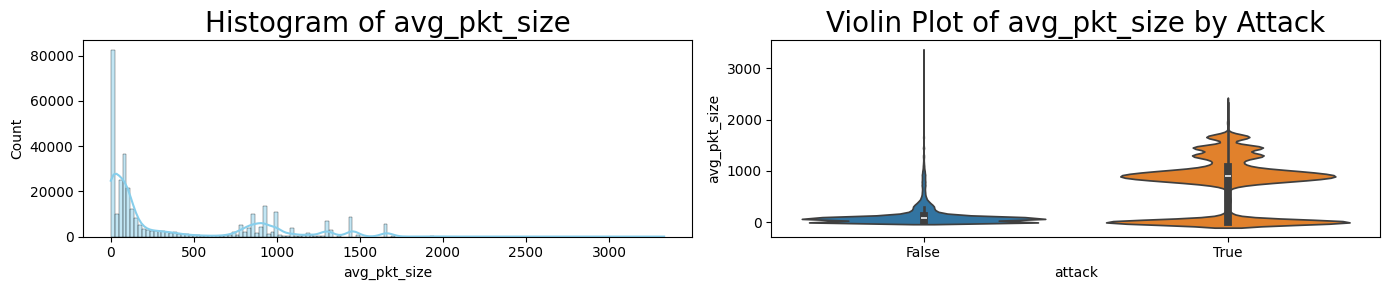

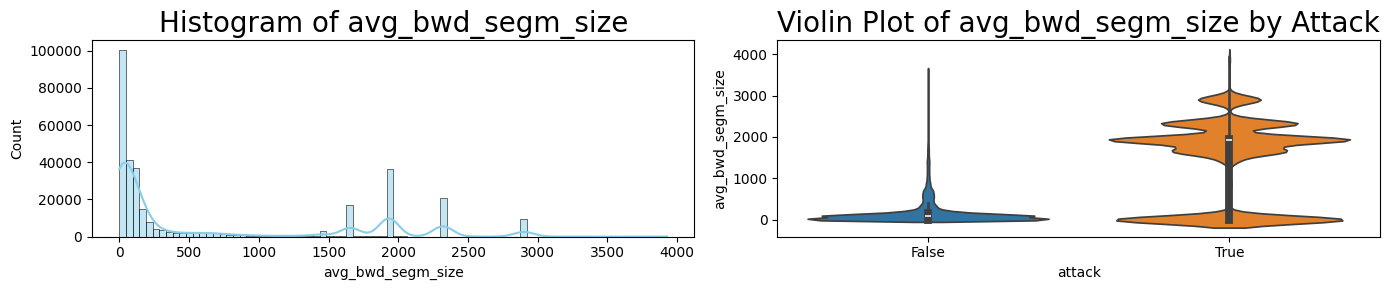

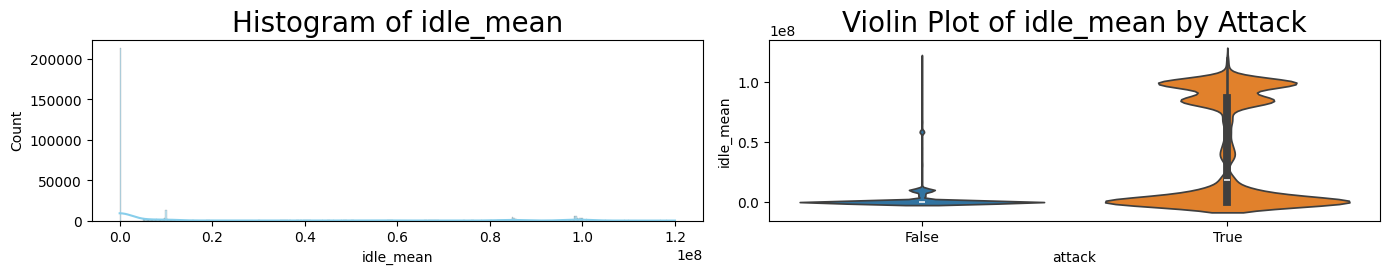

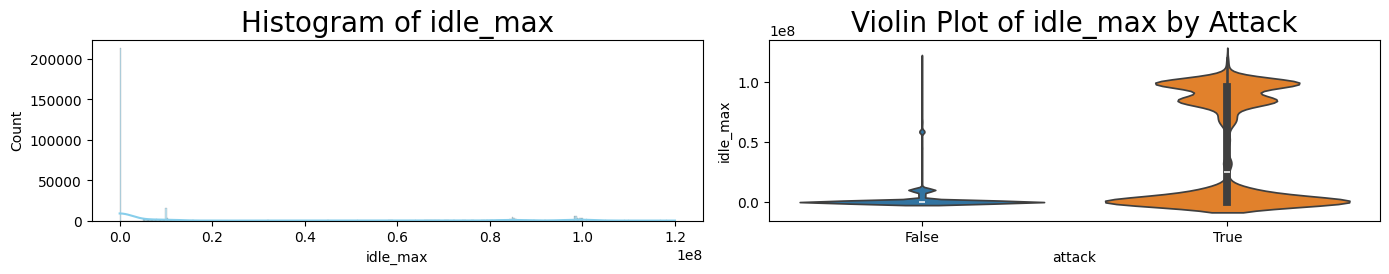

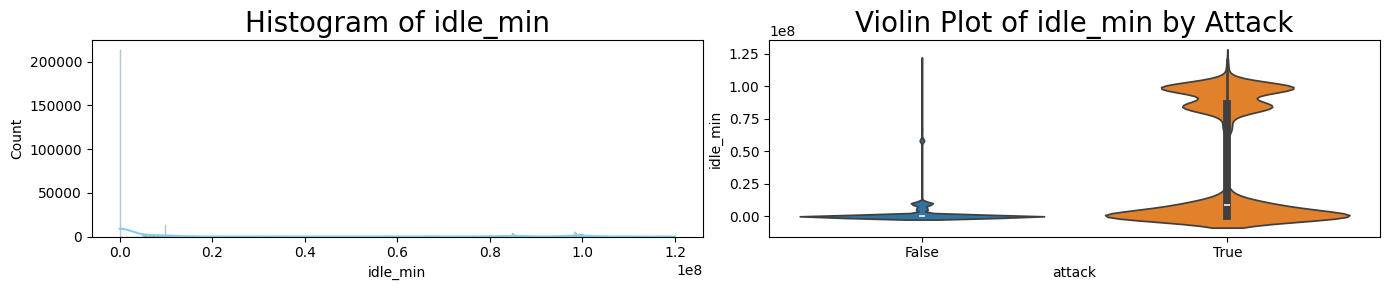

In [21]:
# Filter features with |correlation| > 0.5 w.r.t Attack and compare
target_corr = correlation_matrix['attack'].drop('attack')
for feature in target_corr[abs(target_corr) > 0.5].index.tolist():
    compare_feature_target(feature)